# E Class 모델 읽기

In [111]:
Eclass <- read.csv("../Data/benz3_EClass.csv")
head(Eclass)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
EClass,2015,20769,Automatic,21874,Diesel,165,51.4,3.0
EClass,2017,22270,Automatic,13398,Diesel,165,52.3,3.0
EClass,2019,24541,Automatic,10279,Diesel,145,67.3,2.0
EClass,2017,20880,Automatic,37000,Diesel,30,65.7,2.0
EClass,2015,13990,Automatic,52000,Diesel,125,60.1,2.1
EClass,2010,6980,Manual,79000,Petrol,300,35.3,1.8


In [112]:
# 데이터 확인
unique(Eclass$model)

[1] EClass
Levels: EClass

In [113]:
str(Eclass)

'data.frame':	1953 obs. of  9 variables:
 $ model       : Factor w/ 1 level "EClass": 1 1 1 1 1 1 1 1 1 1 ...
 $ year        : int  2015 2017 2019 2017 2015 2010 2011 2015 2007 2019 ...
 $ price       : int  20769 22270 24541 20880 13990 6980 5740 17480 4880 29991 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 1 1 1 1 1 2 2 1 1 1 ...
 $ mileage     : int  21874 13398 10279 37000 52000 79000 115000 22000 58000 10356 ...
 $ fuelType    : Factor w/ 3 levels "Diesel","Hybrid",..: 1 1 1 1 1 3 1 1 1 1 ...
 $ tax         : int  165 165 145 30 125 300 160 140 315 145 ...
 $ mpg         : num  51.4 52.3 67.3 65.7 60.1 35.3 52.3 53.3 37.2 70.6 ...
 $ engineSize  : num  3 3 2 2 2.1 1.8 2.1 3 3 2 ...


In [114]:
summary(Eclass)

    model           year          price          transmission     mileage      
 EClass:1953   Min.   :2001   Min.   : 2995   Automatic: 804   Min.   :     1  
               1st Qu.:2016   1st Qu.:18991   Manual   :   7   1st Qu.:  7805  
               Median :2017   Median :22980   Semi-Auto:1142   Median : 17729  
               Mean   :2017   Mean   :25481                    Mean   : 23994  
               3rd Qu.:2019   3rd Qu.:30999                    3rd Qu.: 33652  
               Max.   :2020   Max.   :75099                    Max.   :166086  
   fuelType         tax           mpg           engineSize   
 Diesel:1742   Min.   : 10   Min.   : 19.80   Min.   :0.000  
 Hybrid:  33   1st Qu.:145   1st Qu.: 51.40   1st Qu.:2.000  
 Petrol: 178   Median :145   Median : 58.90   Median :2.000  
               Mean   :132   Mean   : 60.34   Mean   :2.261  
               3rd Qu.:145   3rd Qu.: 67.30   3rd Qu.:2.100  
               Max.   :570   Max.   :201.80   Max.   :6.200  

In [115]:
colSums(is.na(Eclass))

model         year        price transmission      mileage     fuelType 
           0            0            0            0            0            0 
         tax          mpg   engineSize 
           0            0            0

> 결측치 없음 

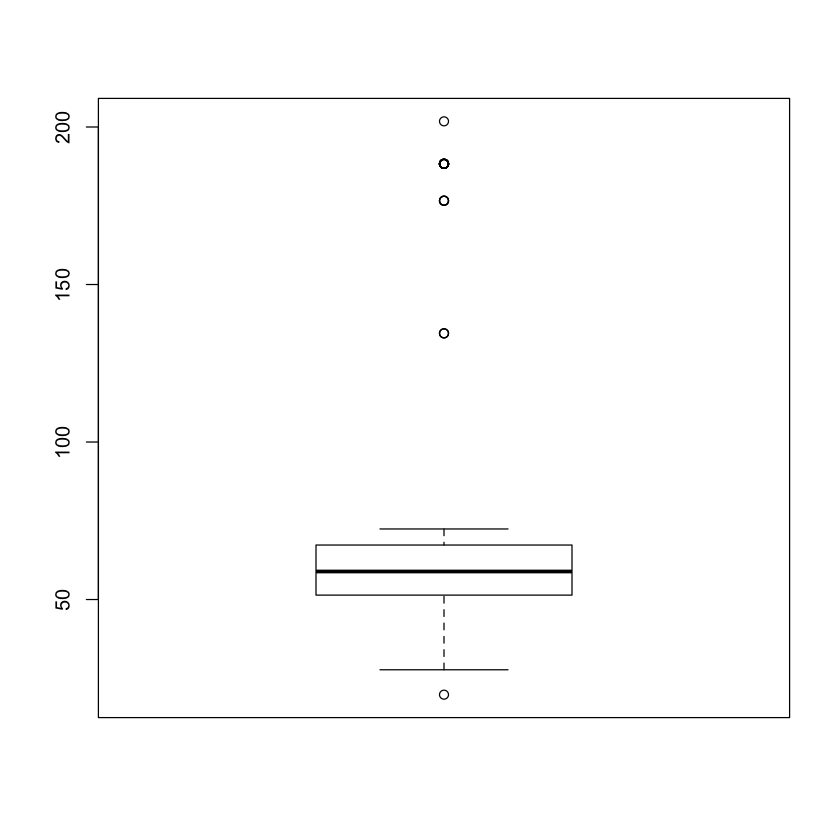

In [116]:
boxplot(Eclass$mpg)

In [117]:
# 이상치 제거 
table(Eclass$mpg)


 19.8  27.7  28.8  29.1  29.4  29.7  30.1    31  31.7  32.1  32.5  32.8  32.9 
    1     2     2     1     1     2     9     3    23    28    23     6     6 
 33.6  33.7  34.9  35.3  35.8  37.2  37.7  38.2  39.2  39.8  40.4  40.9  41.5 
   12     7     2     1     1     2     3     8     6    11    19     1    16 
 42.2  42.8  43.5  44.1  44.8  45.6  46.3  47.1  47.9  48.7  49.6  50.4  51.4 
    4    43     5     4     5    60    13    37     5    58     4    15    63 
 52.3  53.3  53.5  54.3  55.4  56.5  57.6  57.7  58.9  60.1  61.4  62.8  64.2 
   33    27     1    68    21    43     3   142   132    15   139     1    15 
 65.7  67.3  68.9  70.6  72.4 134.5 176.6 188.3 201.8 
  230   102     1    68   371     3     4    21     1 

In [118]:
# 134.5 ~ 201.8 => 29개 삭제 
Eclass <- Eclass[!(Eclass$mpg >= 130),]

In [119]:
table(Eclass$mpg)


19.8 27.7 28.8 29.1 29.4 29.7 30.1   31 31.7 32.1 32.5 32.8 32.9 33.6 33.7 34.9 
   1    2    2    1    1    2    9    3   23   28   23    6    6   12    7    2 
35.3 35.8 37.2 37.7 38.2 39.2 39.8 40.4 40.9 41.5 42.2 42.8 43.5 44.1 44.8 45.6 
   1    1    2    3    8    6   11   19    1   16    4   43    5    4    5   60 
46.3 47.1 47.9 48.7 49.6 50.4 51.4 52.3 53.3 53.5 54.3 55.4 56.5 57.6 57.7 58.9 
  13   37    5   58    4   15   63   33   27    1   68   21   43    3  142  132 
60.1 61.4 62.8 64.2 65.7 67.3 68.9 70.6 72.4 
  15  139    1   15  230  102    1   68  371 

In [120]:
nrow(Eclass)

[1] 1924

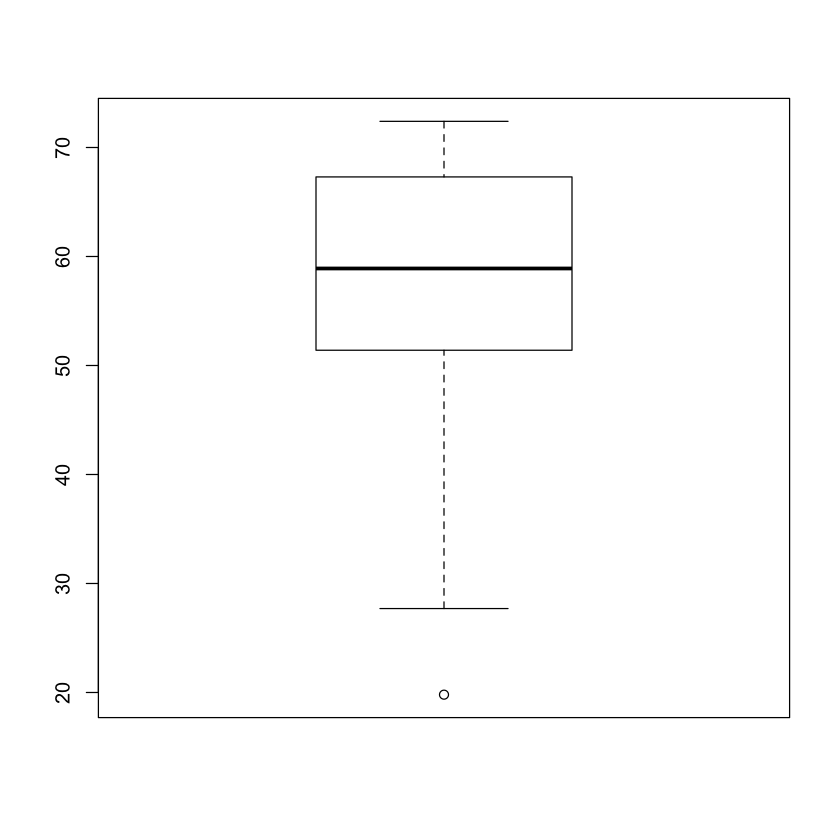

In [121]:
# 이상치 제거 완료 
boxplot(Eclass$mpg)

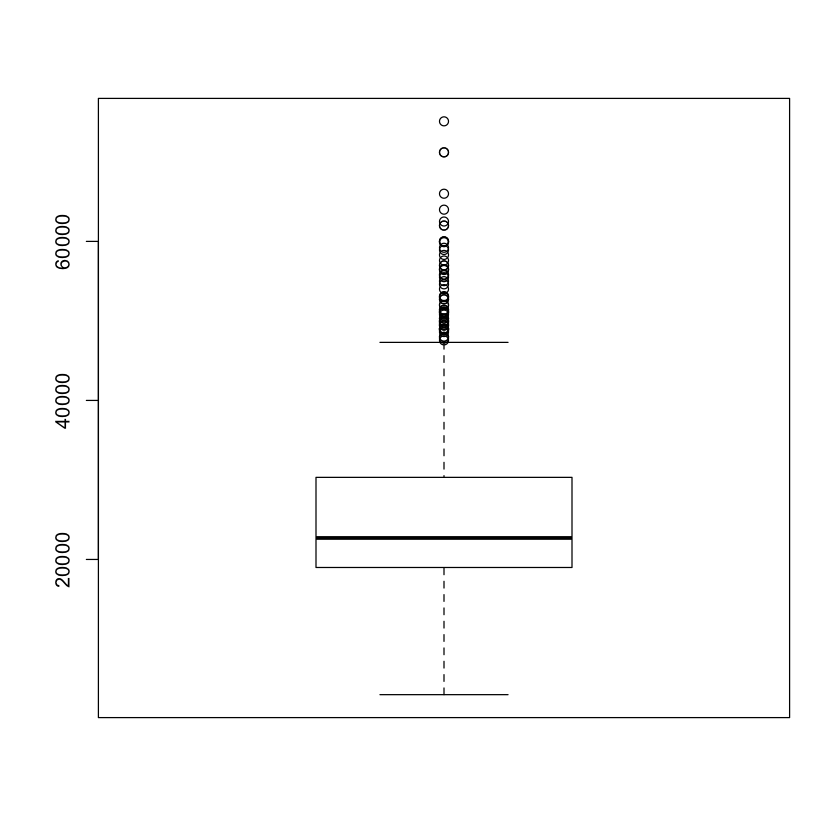

In [122]:
#가격 
boxplot(Eclass$price)

In [123]:
max(Eclass$price)

[1] 75099

In [124]:
table(Eclass$price)


 2995  3485  3990  3995  4700  4880  4950  5495  5740  5950  5995  6350  6775 
    1     1     1     2     1     1     1     1     1     1     2     1     1 
 6794  6980  6999  7295  7490  7995  8238  8290  8500  8750  8850  8899  8949 
    1     1     1     1     1     3     1     1     1     1     1     1     1 
 8985  8999  9000  9250  9295  9300  9489  9495  9499  9500  9550  9980  9990 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
 9995 10000 10490 10491 10499 10500 10505 10595 10636 10675 10880 10990 10991 
    3     2     1     1     1     1     1     1     1     1     1     1     1 
10996 11000 11119 11229 11230 11250 11295 11299 11350 11351 11472 11490 11495 
    1     1     1     1     1     2     1     1     1     1     1     2     2 
11650 11698 11795 11899 11950 11972 11990 11995 11999 12000 12013 12230 12295 
    1     1     1     1     4     1     5     2     2     1     1     1     1 
12299 12340 12437 12450 12460 12490 12495 12499 125

In [125]:
# 가격이 71199,75099 삭제 
Eclass<- Eclass[Eclass$price !=75099,]

In [126]:
Eclass<- Eclass[Eclass$price !=71199,]

In [127]:
table(Eclass$price)


 2995  3485  3990  3995  4700  4880  4950  5495  5740  5950  5995  6350  6775 
    1     1     1     2     1     1     1     1     1     1     2     1     1 
 6794  6980  6999  7295  7490  7995  8238  8290  8500  8750  8850  8899  8949 
    1     1     1     1     1     3     1     1     1     1     1     1     1 
 8985  8999  9000  9250  9295  9300  9489  9495  9499  9500  9550  9980  9990 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
 9995 10000 10490 10491 10499 10500 10505 10595 10636 10675 10880 10990 10991 
    3     2     1     1     1     1     1     1     1     1     1     1     1 
10996 11000 11119 11229 11230 11250 11295 11299 11350 11351 11472 11490 11495 
    1     1     1     1     1     2     1     1     1     1     1     2     2 
11650 11698 11795 11899 11950 11972 11990 11995 11999 12000 12013 12230 12295 
    1     1     1     1     4     1     5     2     2     1     1     1     1 
12299 12340 12437 12450 12460 12490 12495 12499 125

In [128]:
nrow(Eclass)

[1] 1921

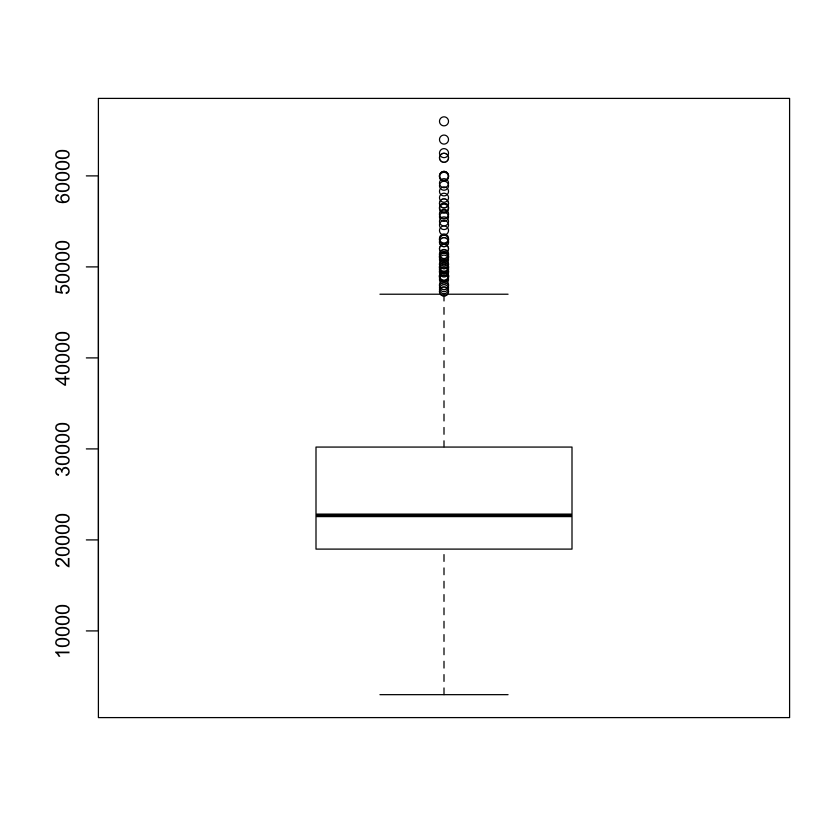

In [129]:
# 이상치 제거 완료 
boxplot(Eclass$price)

In [130]:
table(Eclass$mileage)


     1      9     10     12     16     20     33     35     40     50     51 
     1      6      1      1      1      4      1      2      1      3      1 
    74     75     89     90    100    101    103    136    150    159    169 
     1      1      2      1      3      4      1      1      3      2      2 
   175    197    199    200    250    275    298    378    413    484    500 
     1      1      1      1      1      1      1      1      1      1      2 
   513    629    648    716    723    750    770    794    811    870    890 
     1      1      1      1      2      1      1      1      1      1      1 
   922    999   1000   1001   1005   1040   1070   1078   1096   1145   1171 
     1      3     35      1      2      1      1      1      1      1      1 
  1255   1306   1347   1411   1450   1462   1483   1489   1499   1500   1502 
     1      1      1      1      1      1      1      1      5      2      1 
  1506   1539   1550   1585   1600   1624   1667   1746   1800 

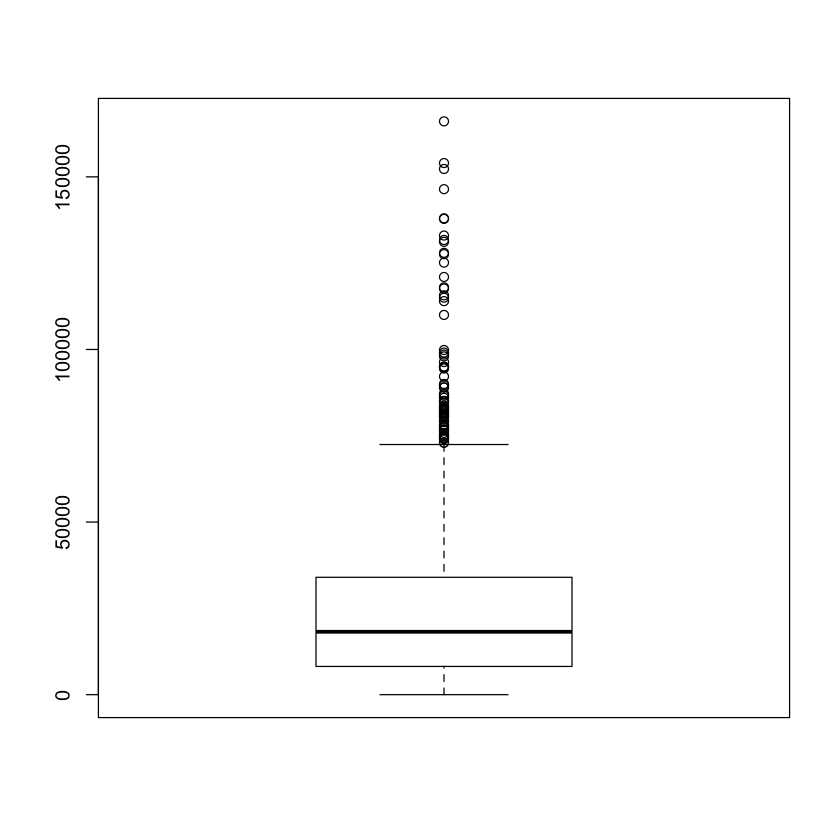

In [131]:
boxplot(Eclass$mileage)

In [132]:
#mileage가 115000 이상  삭제
Eclass<- Eclass[!(Eclass$mileage >=100000),]

In [133]:
table(Eclass$mileage)


    1     9    10    12    16    20    33    35    40    50    51    74    75 
    1     6     1     1     1     4     1     2     1     3     1     1     1 
   89    90   100   101   103   136   150   159   169   175   197   199   200 
    2     1     3     4     1     1     3     2     2     1     1     1     1 
  250   275   298   378   413   484   500   513   629   648   716   723   750 
    1     1     1     1     1     1     2     1     1     1     1     2     1 
  770   794   811   870   890   922   999  1000  1001  1005  1040  1070  1078 
    1     1     1     1     1     1     3    35     1     2     1     1     1 
 1096  1145  1171  1255  1306  1347  1411  1450  1462  1483  1489  1499  1500 
    1     1     1     1     1     1     1     1     1     1     1     5     2 
 1502  1506  1539  1550  1585  1600  1624  1667  1746  1800  1810  1825  1842 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 1854  1934  1989  2000  2003  2004  2103  2110  21

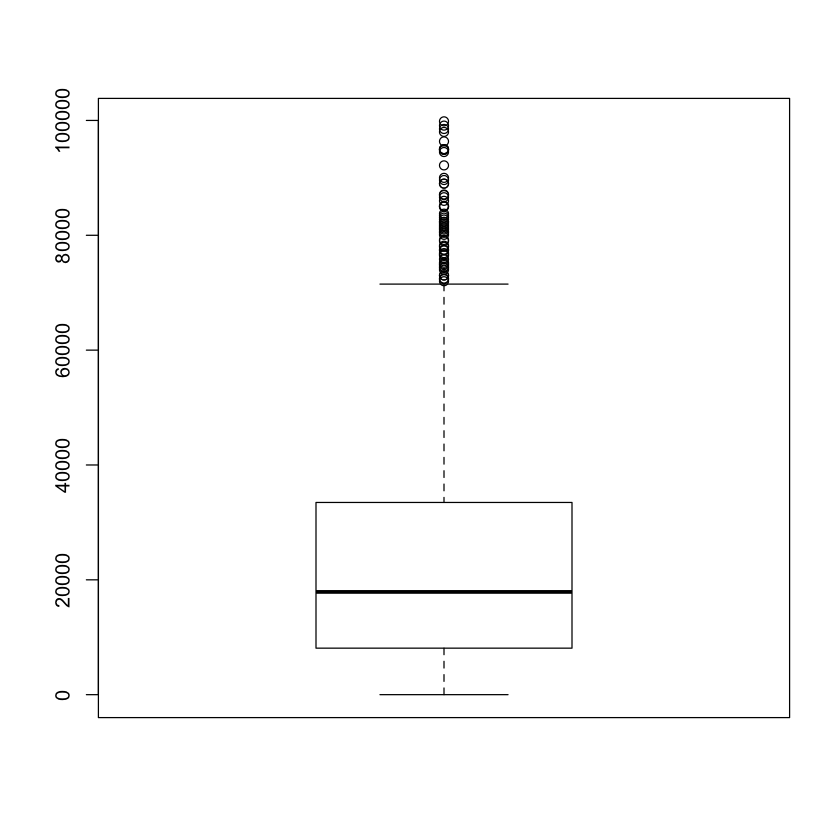

In [134]:
boxplot(Eclass$mileage)

In [135]:
# enginesize
table(Eclass$engineSize)


   0  1.8    2  2.1  2.2  2.9    3  3.5    4  5.5  6.2 
   1    4 1166  280    4   10  416    4   13    3    1 

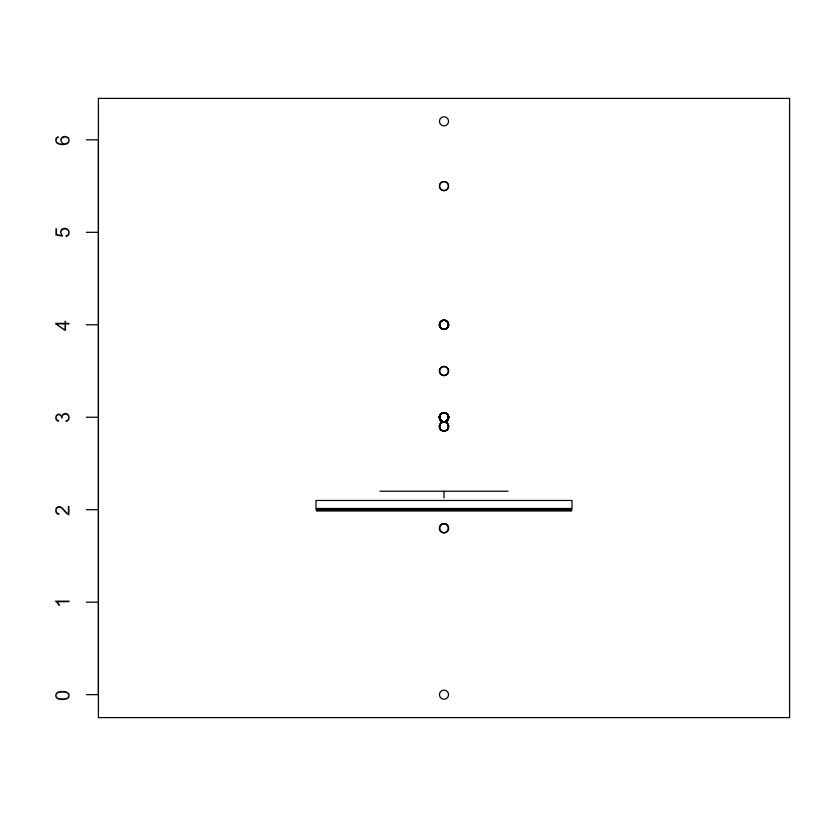

In [136]:
boxplot(Eclass$engineSize)

In [137]:
table(Eclass$engineSize)


   0  1.8    2  2.1  2.2  2.9    3  3.5    4  5.5  6.2 
   1    4 1166  280    4   10  416    4   13    3    1 

In [138]:
nrow(Eclass)

[1] 1902

In [139]:
# transmission = manual 삭제 
nrow(subset(Eclass,transmission == "Manual"))

[1] 4

In [140]:
Eclass <- Eclass[Eclass$transmission != "Manual",]

In [141]:
nrow(Eclass)

[1] 1898

In [142]:
tail(Eclass)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1948,EClass,2016,22636,Automatic,12902,Diesel,165,50.4,3
1949,EClass,2015,18135,Automatic,18849,Diesel,150,54.3,3
1950,EClass,2015,18049,Automatic,30410,Diesel,150,54.3,3
1951,EClass,2015,20374,Automatic,30288,Diesel,165,51.4,3
1952,EClass,2017,21237,Automatic,24463,Diesel,165,52.3,3
1953,EClass,2019,24249,Automatic,10860,Diesel,145,72.4,2


In [143]:
rownames(Eclass) <- c()

In [144]:
Eclass$transmission <- factor(Eclass$transmission)

In [145]:
str(Eclass)

'data.frame':	1898 obs. of  9 variables:
 $ model       : Factor w/ 1 level "EClass": 1 1 1 1 1 1 1 1 1 1 ...
 $ year        : int  2015 2017 2019 2017 2015 2015 2007 2019 2020 2017 ...
 $ price       : int  20769 22270 24541 20880 13990 17480 4880 29991 35438 22890 ...
 $ transmission: Factor w/ 2 levels "Automatic","Semi-Auto": 1 1 1 1 1 1 1 1 1 1 ...
 $ mileage     : int  21874 13398 10279 37000 52000 22000 58000 10356 3500 34934 ...
 $ fuelType    : Factor w/ 3 levels "Diesel","Hybrid",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ tax         : int  165 165 145 30 125 140 315 145 145 150 ...
 $ mpg         : num  51.4 52.3 67.3 65.7 60.1 53.3 37.2 70.6 42.8 61.4 ...
 $ engineSize  : num  3 3 2 2 2.1 3 3 2 2 2 ...


In [146]:
head(Eclass)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
EClass,2015,20769,Automatic,21874,Diesel,165,51.4,3.0
EClass,2017,22270,Automatic,13398,Diesel,165,52.3,3.0
EClass,2019,24541,Automatic,10279,Diesel,145,67.3,2.0
EClass,2017,20880,Automatic,37000,Diesel,30,65.7,2.0
EClass,2015,13990,Automatic,52000,Diesel,125,60.1,2.1
EClass,2015,17480,Automatic,22000,Diesel,140,53.3,3.0


In [147]:
# tax 칼럼 삭제 
Eclass <- Eclass[,-7]

In [148]:
head(Eclass)

model,year,price,transmission,mileage,fuelType,mpg,engineSize
EClass,2015,20769,Automatic,21874,Diesel,51.4,3.0
EClass,2017,22270,Automatic,13398,Diesel,52.3,3.0
EClass,2019,24541,Automatic,10279,Diesel,67.3,2.0
EClass,2017,20880,Automatic,37000,Diesel,65.7,2.0
EClass,2015,13990,Automatic,52000,Diesel,60.1,2.1
EClass,2015,17480,Automatic,22000,Diesel,53.3,3.0


In [149]:
# 상관관계
cor(Eclass$price,Eclass$mileage)

[1] -0.7388721

In [150]:
# price ~ year
cor(Eclass$price,Eclass$year)

[1] 0.7485106

In [151]:
# price ~ mpg
cor(Eclass$price,Eclass$mpg)

[1] -0.5010916

In [152]:
# price ~ engineSize
cor(Eclass$price,Eclass$engineSize)

[1] 0.3683304

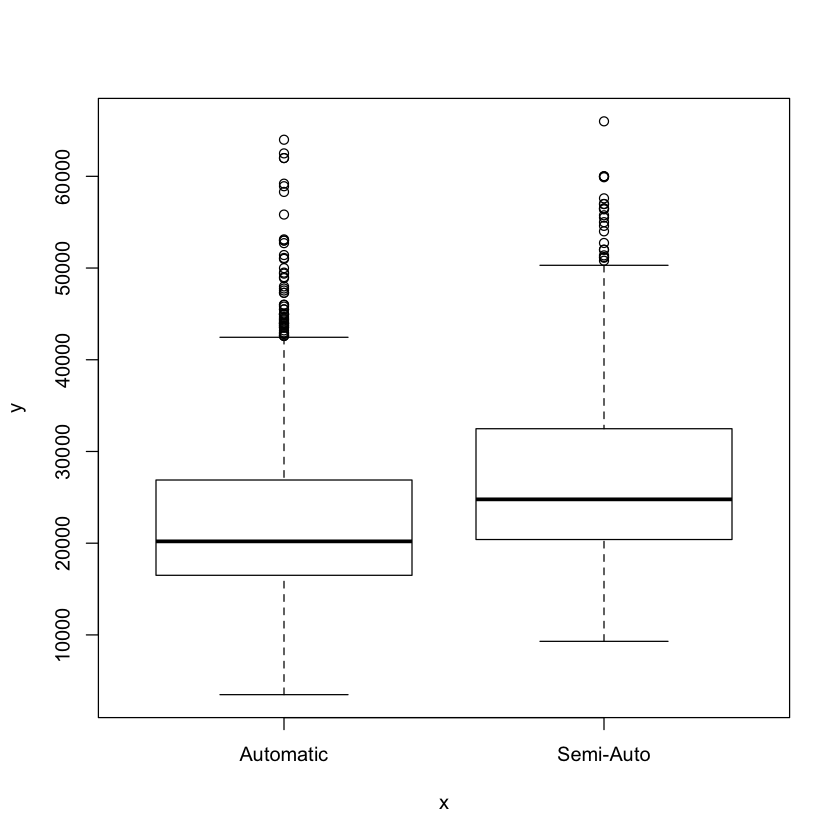

In [153]:
# price ,tranmission
plot(Eclass$transmission,Eclass$price)

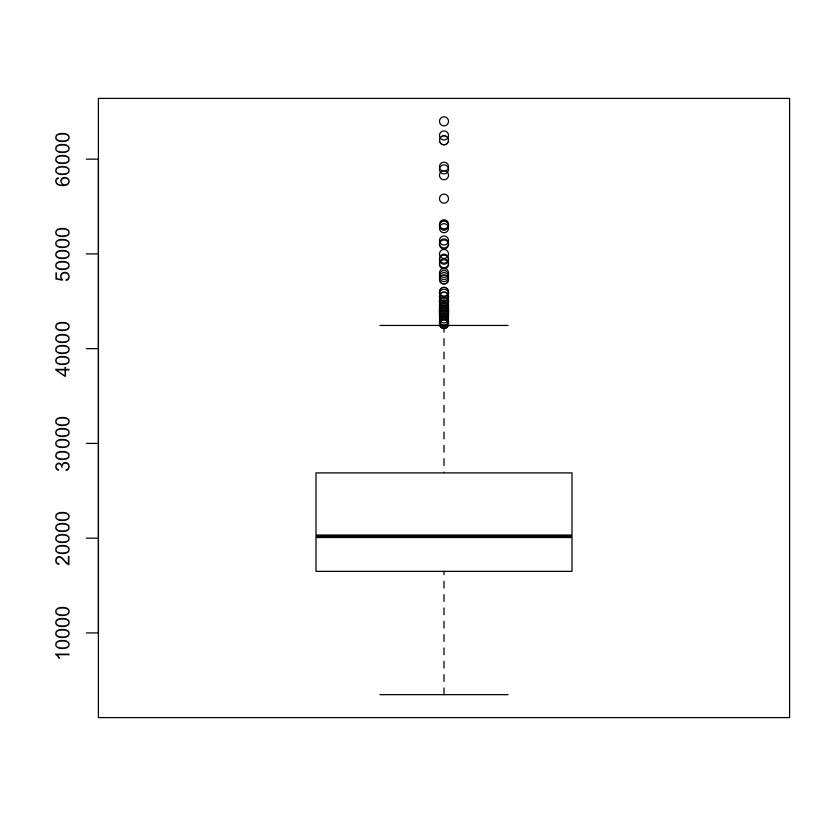

In [154]:
boxplot(subset(Eclass,transmission == "Automatic")$price)

In [155]:
nrow(subset(Eclass,price > 60000 & transmission == "Automatic"))

[1] 4

In [156]:
# 60000 이상 제거 
Eclass <- Eclass[!(Eclass$price > 60000 & Eclass$transmission == "Automatic"),]

In [157]:
nrow(Eclass)

[1] 1894

In [158]:
tail(Eclass)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
1893,EClass,2016,22636,Automatic,12902,Diesel,50.4,3
1894,EClass,2015,18135,Automatic,18849,Diesel,54.3,3
1895,EClass,2015,18049,Automatic,30410,Diesel,54.3,3
1896,EClass,2015,20374,Automatic,30288,Diesel,51.4,3
1897,EClass,2017,21237,Automatic,24463,Diesel,52.3,3
1898,EClass,2019,24249,Automatic,10860,Diesel,72.4,2


In [159]:
rownames(Eclass) <- c()

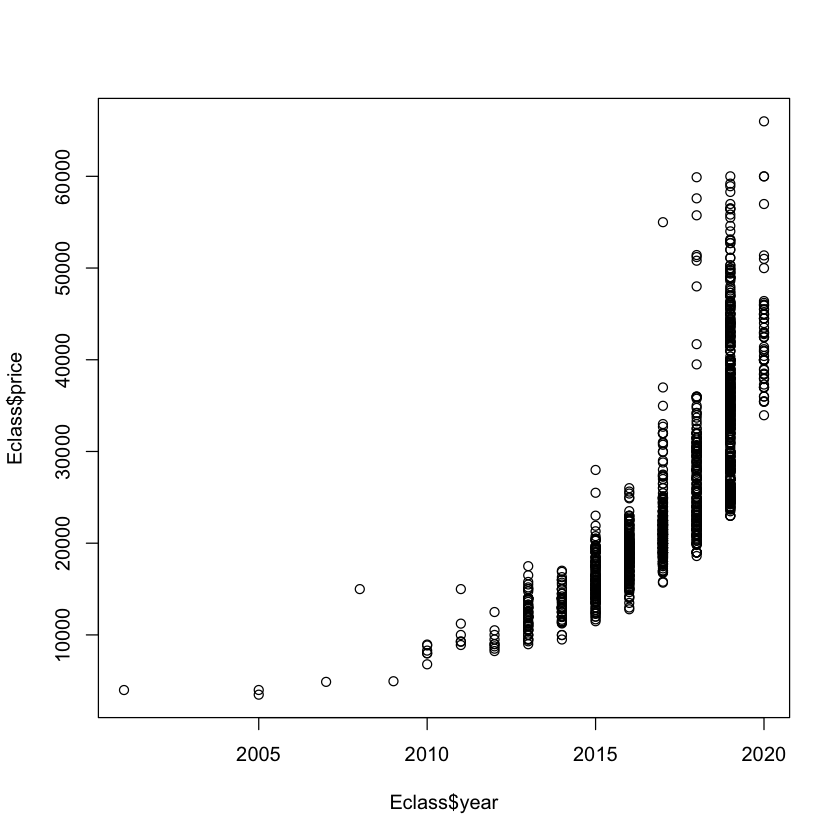

In [160]:
# price ,year
plot(Eclass$year,Eclass$price)

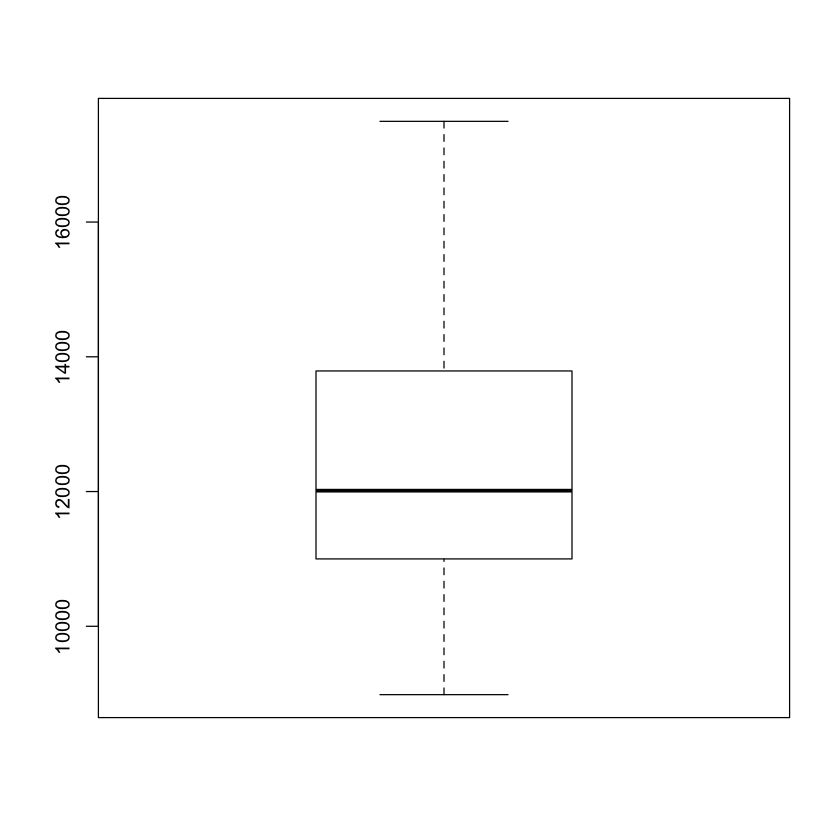

In [161]:
# 이상치 제거 
# 2013
boxplot(subset(Eclass, year == 2013)$price)

In [162]:
table(subset(Eclass, year == 2013)$price)


 8985  9300  9489  9495  9550  9990  9995 10000 10490 10491 10499 10595 10636 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
10880 10990 10996 11000 11119 11229 11250 11295 11299 11490 11795 11899 11950 
    1     1     1     1     1     1     1     1     1     1     1     1     3 
11990 11995 12013 12230 12299 12460 12490 12499 12622 12893 12990 13000 13150 
    3     1     1     1     1     1     1     1     1     1     3     1     1 
13298 13300 13599 13790 13798 13965 13991 13995 14000 14750 14999 15000 15182 
    1     1     1     1     1     1     1     4     1     1     1     1     1 
15499 15775 16500 17495 
    1     1     1     1 

In [163]:
# 이상치 제거 
Eclass <- Eclass[!(Eclass$year == 2013 & Eclass$price < 6000),]
# 완료 


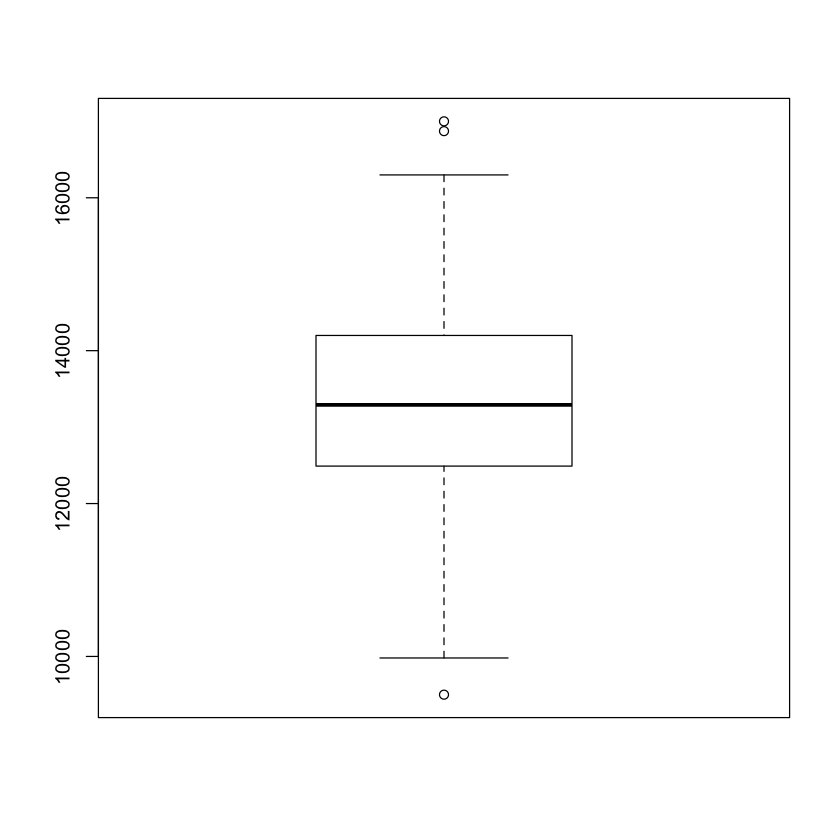

In [164]:
# 2014
boxplot(subset(Eclass, year == 2014)$price)

In [165]:
table(subset(Eclass, year == 2014)$price)


 9500  9980  9990 11250 11350 11351 11472 11495 11650 11950 11972 11990 11999 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
12450 12490 12500 12795 12802 12899 12900 12990 12995 12999 13000 13100 13291 
    1     2     1     1     1     1     1     1     2     1     3     1     1 
13490 13590 13750 13799 13890 13967 13970 13990 13995 13998 13999 14000 14199 
    1     1     1     1     1     1     1     2     1     1     1     2     1 
14490 14499 14500 14975 14995 14999 15000 15491 15695 15995 15998 16000 16299 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
16872 17000 
    1     1 

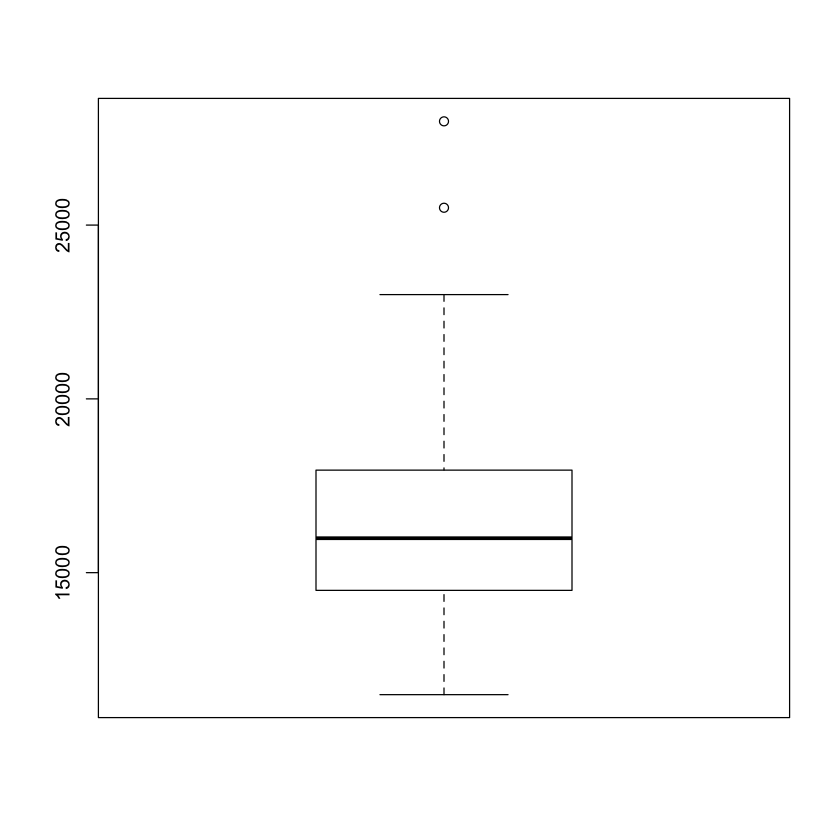

In [166]:
# 2015
boxplot(subset(Eclass, year == 2015)$price)

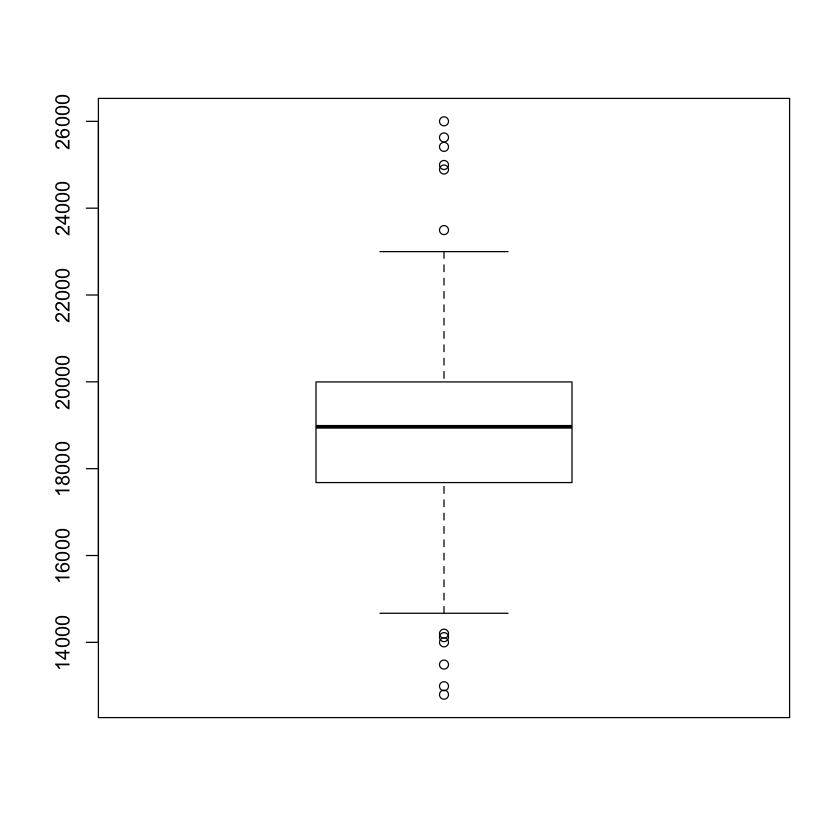

In [167]:
# 2016
boxplot(subset(Eclass, year == 2016)$price)

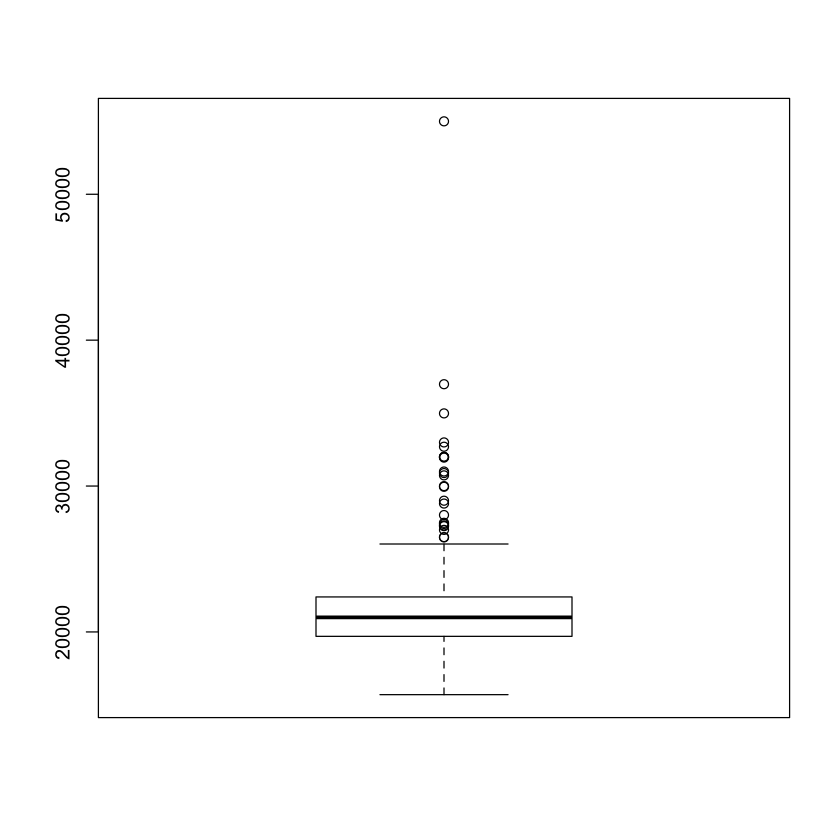

In [168]:
# 2017
boxplot(subset(Eclass, year == 2017)$price)

In [169]:
# 이상치 제거 
Eclass <- Eclass[!(Eclass$year == 2017 & Eclass$price > 30000),]
# 12개 완료 

In [170]:
table(subset(Eclass, year == 2017)$price)


15700 15800 16800 16950 16989 16995 16998 17250 17500 17650 17698 17700 17800 
    1     1     3     1     1     1     1     1     2     1     1     2     4 
17989 17990 17999 18000 18037 18250 18298 18300 18337 18400 18475 18480 18490 
    1     1     1     2     1     1     1     1     1     1     1     1     1 
18499 18500 18600 18660 18699 18700 18791 18795 18798 18799 18836 18870 18886 
    1     3     2     1     1     2     1     1     1     1     1     1     1 
18900 18936 18966 18990 18999 19000 19070 19150 19199 19200 19212 19250 19260 
    1     1     1     5     3     7     1     1     2     2     1     1     1 
19290 19299 19395 19400 19449 19450 19490 19495 19498 19499 19500 19599 19696 
    1     1     1     1     1     1     2     1     5     2     7     1     1 
19698 19699 19722 19751 19760 19795 19799 19849 19891 19899 19922 19940 19950 
    1     2     1     1     1     1     1     1     1     1     2     1     1 
19970 19980 19989 19990 19995 19998 19999 20000 200

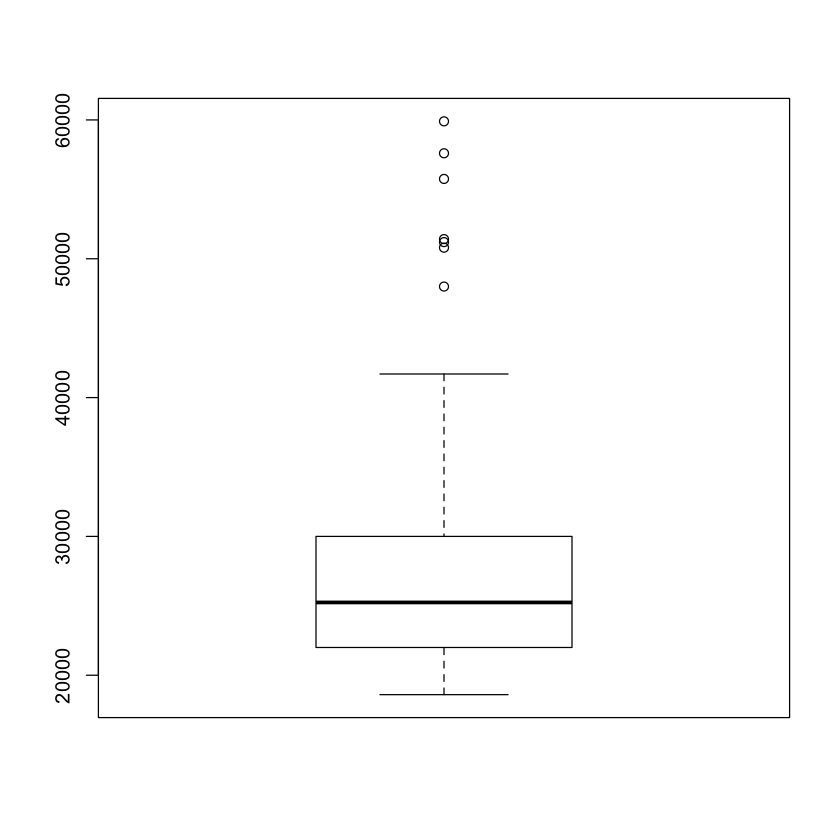

In [171]:
# 2018
boxplot(subset(Eclass, year == 2018)$price)

In [172]:
table(subset(Eclass, year == 2018)$price)


18600 19000 19800 19899 19900 20000 20250 20300 20399 20485 20599 20795 20800 
    1     8     1     1     1     4     1     1     1     1     1     1     7 
20900 20980 20999 21000 21331 21386 21490 21495 21498 21499 21500 21790 21799 
    1     1     1     2     1     1     1     1     1     2     4     1     1 
21899 21990 21995 21999 22049 22240 22250 22299 22400 22490 22499 22500 22691 
    2     2     1     2     1     1     1     1     1     1     2     1     1 
22699 22738 22980 22995 22998 22999 23089 23102 23299 23354 23399 23480 23499 
    2     1     1     1     1     2     1     1     1     1     2     3     1 
23500 23649 23900 23963 23989 23990 23995 23998 24000 24040 24220 24399 24480 
    1     1     1     1     1     2     1     1     2     1     1     1     1 
24490 24500 24676 24790 24892 24950 24975 24990 25495 25498 25499 25500 25699 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
25749 25882 25980 26000 26250 26490 26499 26965 269

In [173]:
nrow(subset(Eclass,year == 2018 & price > 30000))

[1] 52

In [174]:
# 이상치 제거 
Eclass <- Eclass[!(Eclass$year == 2018 & Eclass$price > 30000),]
# 완료

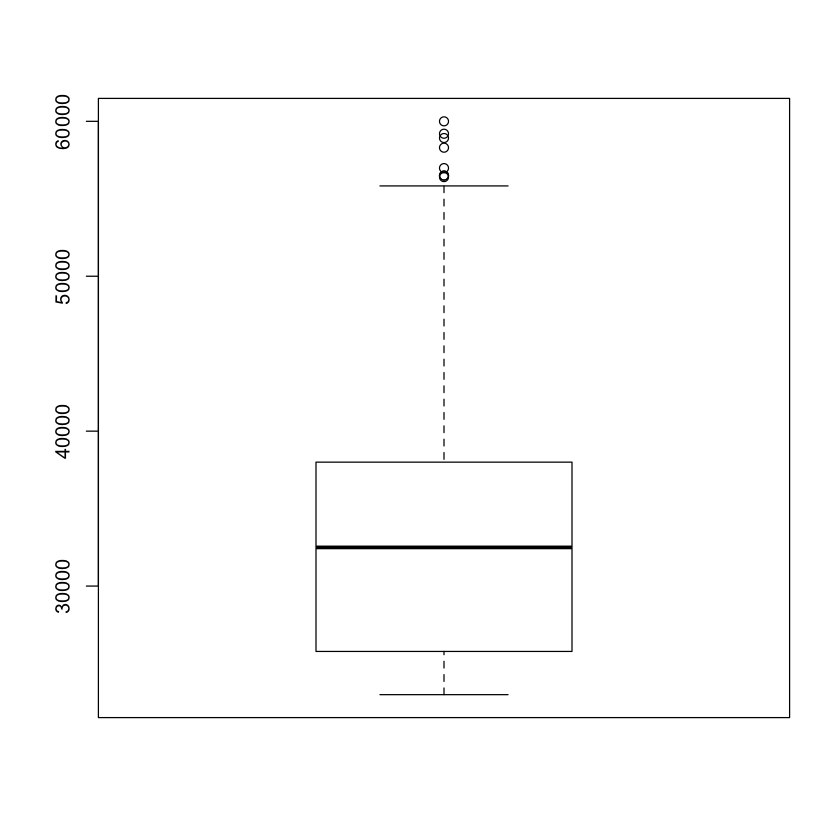

In [175]:
# 2019
boxplot(subset(Eclass, year == 2019)$price)

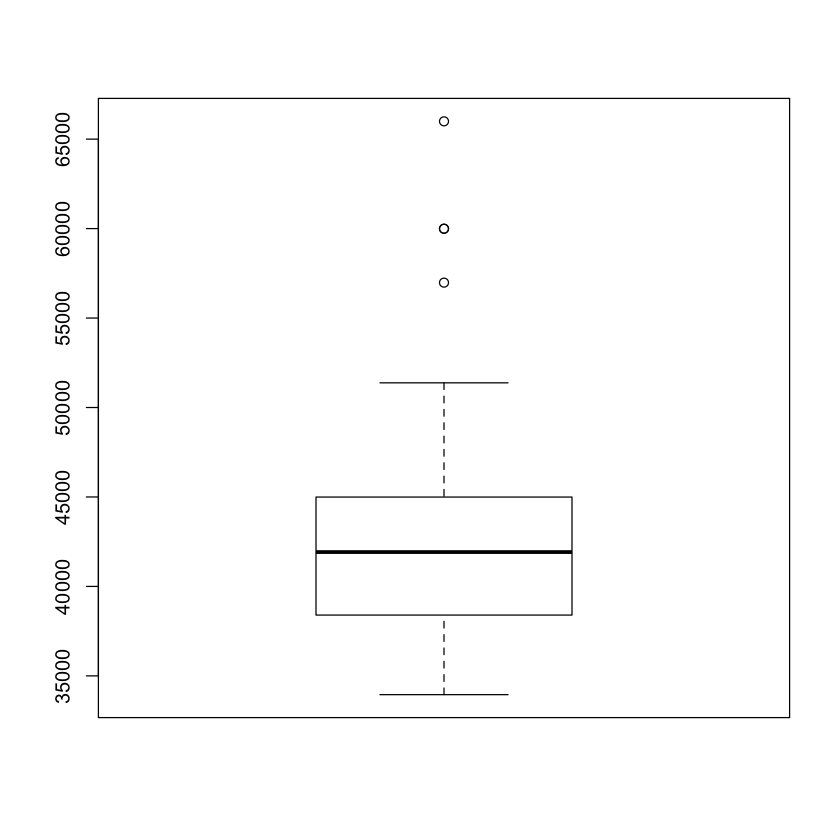

In [176]:
# 2020
boxplot(subset(Eclass, year == 2020)$price)

In [177]:
table(subset(Eclass, year == 2020)$price)


33950 35409 35438 35480 35990 36980 36990 37029 37298 37890 37950 37998 38399 
    1     1     1     1     2     2     1     1     1     1     1     1     2 
38490 38890 38990 39895 39980 39989 39991 39995 40411 40900 40979 41149 41400 
    1     1     1     1     1     1     2     2     1     1     1     1     1 
42441 42480 42490 42798 42900 42990 42991 43498 44000 44500 44900 44980 44995 
    1     1     1     1     1     1     1     1     1     4     1     1     2 
45498 45499 45900 45990 45995 46200 46402 49990 50998 51379 56980 59990 59995 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
65995 
    1 

In [178]:
# 이상치 제거 
Eclass <- Eclass[!(Eclass$year == 2020 & Eclass$price > 60000),]
# 완료

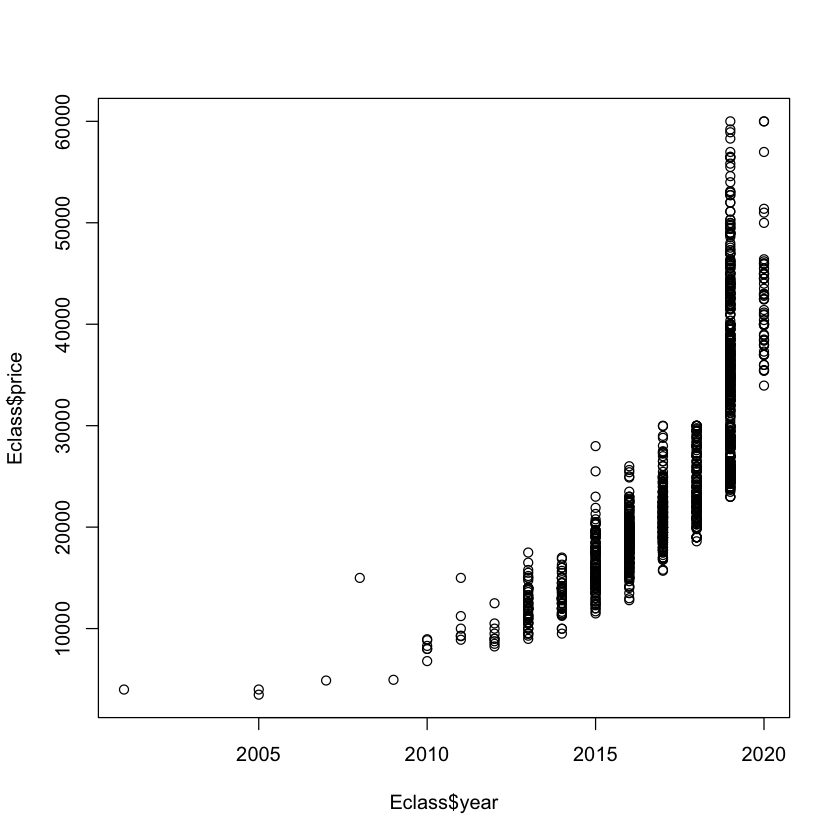

In [179]:
# 연도별 이상치 제거 완료 
plot(Eclass$year,Eclass$price)

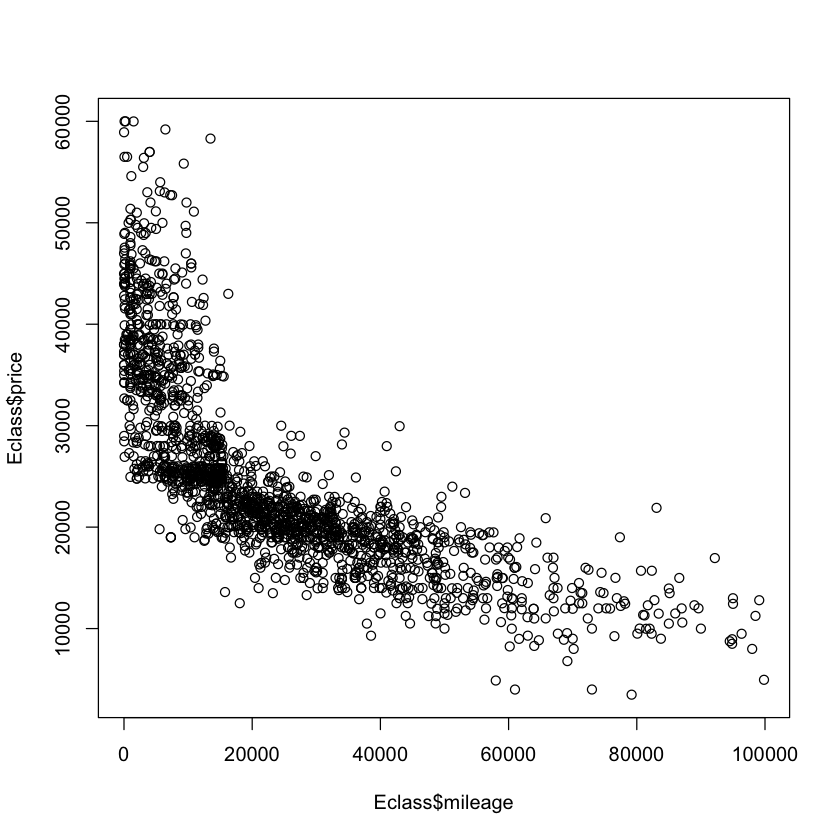

In [180]:
# price ,mileage
plot(Eclass$mileage,Eclass$price)

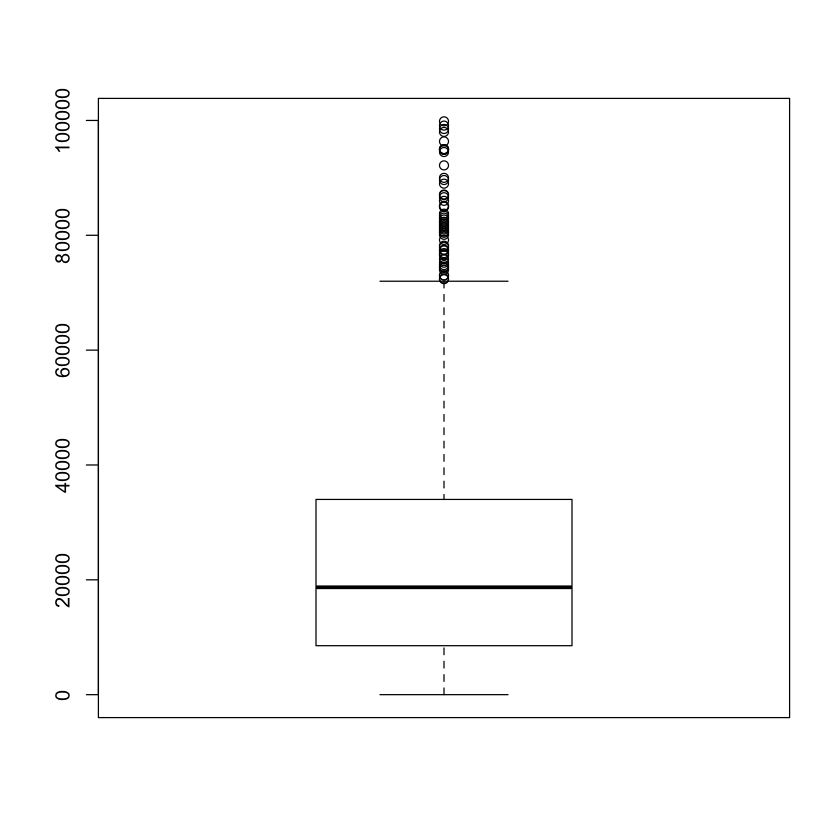

In [181]:
# 이상치 확인 
boxplot(Eclass$mileage)

In [182]:
table(Eclass$mileage)


    1     9    10    12    16    20    33    35    40    50    51    74    90 
    1     6     1     1     1     4     1     2     1     3     1     1     1 
  100   101   103   136   150   159   169   175   197   199   250   275   298 
    3     4     1     1     3     2     1     1     1     1     1     1     1 
  378   484   500   513   629   648   716   723   750   770   794   811   870 
    1     1     2     1     1     1     1     2     1     1     1     1     1 
  890   922   999  1000  1001  1005  1040  1070  1078  1096  1145  1171  1255 
    1     1     3    35     1     2     1     1     1     1     1     1     1 
 1347  1411  1450  1483  1489  1499  1500  1502  1506  1550  1600  1624  1667 
    1     1     1     1     1     5     1     1     1     1     1     1     1 
 1746  1800  1810  1825  1842  1854  1934  1989  2000  2003  2004  2103  2110 
    1     1     1     1     1     1     1     2    10     1     1     1     1 
 2134  2138  2175  2183  2184  2202  2247  2264  22

In [183]:
Eclass <- Eclass[!(Eclass$mileage > 110000),]
# 완료

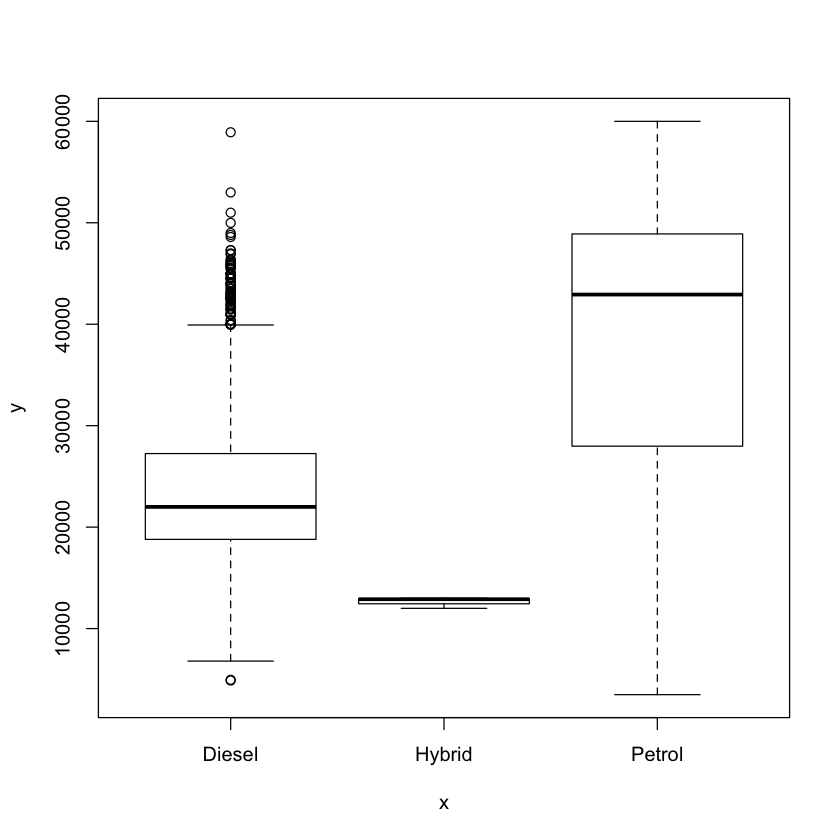

In [184]:
# price ,fueltype
plot(Eclass$fuelType,Eclass$price)

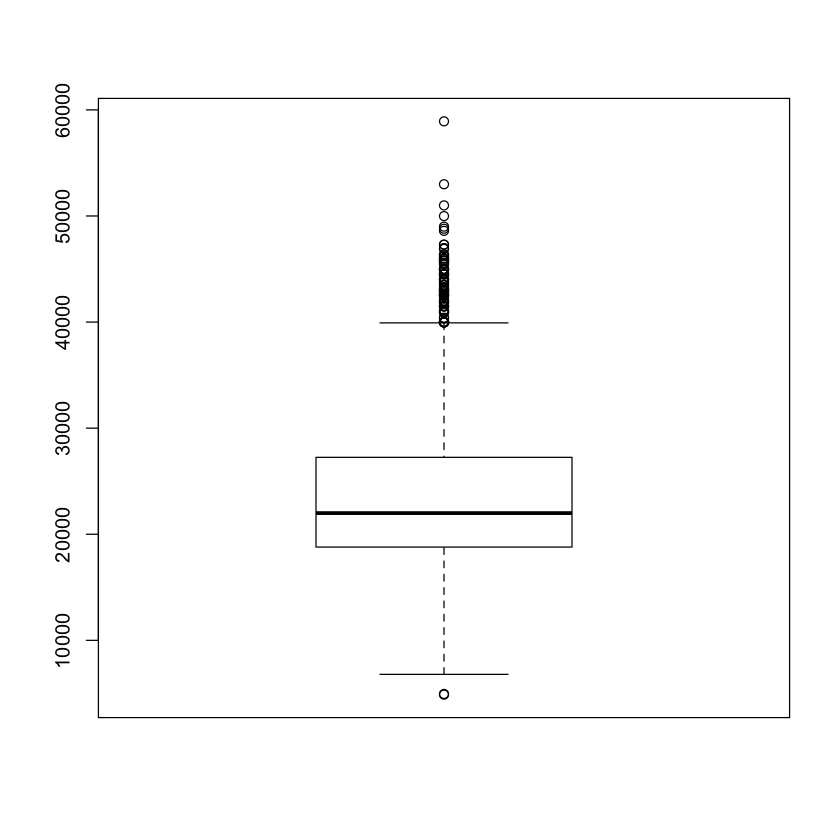

In [185]:
boxplot(subset(Eclass,fuelType == "Diesel")$price)

In [186]:
#age 칼럼 추가 
Eclass$age <- 2020 - (Eclass$year)
head(Eclass)

model,year,price,transmission,mileage,fuelType,mpg,engineSize,age
EClass,2015,20769,Automatic,21874,Diesel,51.4,3.0,5
EClass,2017,22270,Automatic,13398,Diesel,52.3,3.0,3
EClass,2019,24541,Automatic,10279,Diesel,67.3,2.0,1
EClass,2017,20880,Automatic,37000,Diesel,65.7,2.0,3
EClass,2015,13990,Automatic,52000,Diesel,60.1,2.1,5
EClass,2015,17480,Automatic,22000,Diesel,53.3,3.0,5


In [187]:
# model칼럼 삭제
Eclass <- Eclass[,-1]
head(Eclass)

year,price,transmission,mileage,fuelType,mpg,engineSize,age
2015,20769,Automatic,21874,Diesel,51.4,3.0,5
2017,22270,Automatic,13398,Diesel,52.3,3.0,3
2019,24541,Automatic,10279,Diesel,67.3,2.0,1
2017,20880,Automatic,37000,Diesel,65.7,2.0,3
2015,13990,Automatic,52000,Diesel,60.1,2.1,5
2015,17480,Automatic,22000,Diesel,53.3,3.0,5


In [188]:
summary(Eclass)

      year          price          transmission     mileage        fuelType   
 Min.   :2001   Min.   : 3485   Automatic: 758   Min.   :    1   Diesel:1685  
 1st Qu.:2016   1st Qu.:18990   Semi-Auto:1071   1st Qu.: 8529   Hybrid:   3  
 Median :2017   Median :22480                    Median :18701   Petrol: 141  
 Mean   :2017   Mean   :24954                    Mean   :23656                
 3rd Qu.:2019   3rd Qu.:28899                    3rd Qu.:34000                
 Max.   :2020   Max.   :59999                    Max.   :99844                
      mpg          engineSize         age        
 Min.   :19.80   Min.   :0.000   Min.   : 0.000  
 1st Qu.:52.30   1st Qu.:2.000   1st Qu.: 1.000  
 Median :61.40   Median :2.000   Median : 3.000  
 Mean   :59.17   Mean   :2.245   Mean   : 2.745  
 3rd Qu.:67.30   3rd Qu.:2.100   3rd Qu.: 4.000  
 Max.   :72.40   Max.   :6.200   Max.   :19.000  

In [189]:
# age = 0 삭제
# 61개 
Eclass<- Eclass[Eclass$age != 0,]

In [190]:
nrow(subset(Eclass,age == 0))

[1] 0

In [191]:
nrow(subset(Eclass,fuelType =="Hybrid"))

[1] 3

In [192]:
# fueltype = hybrid 삭제 
# 3개
Eclass <- Eclass[!Eclass$fuelType == "Hybrid",]

In [193]:
tail(Eclass)

,year,price,transmission,mileage,fuelType,mpg,engineSize,age
1889,2016,22636,Automatic,12902,Diesel,50.4,3,4
1890,2015,18135,Automatic,18849,Diesel,54.3,3,5
1891,2015,18049,Automatic,30410,Diesel,54.3,3,5
1892,2015,20374,Automatic,30288,Diesel,51.4,3,5
1893,2017,21237,Automatic,24463,Diesel,52.3,3,3
1894,2019,24249,Automatic,10860,Diesel,72.4,2,1


In [194]:
rownames(Eclass) <-c()

In [195]:
nrow(Eclass)

[1] 1765

In [196]:
# year 삭제
Eclass <- Eclass[,-c(1)]
head(Eclass)

price,transmission,mileage,fuelType,mpg,engineSize,age
20769,Automatic,21874,Diesel,51.4,3.0,5
22270,Automatic,13398,Diesel,52.3,3.0,3
24541,Automatic,10279,Diesel,67.3,2.0,1
20880,Automatic,37000,Diesel,65.7,2.0,3
13990,Automatic,52000,Diesel,60.1,2.1,5
17480,Automatic,22000,Diesel,53.3,3.0,5


In [197]:
library(dplyr)

In [198]:
Eclass<- arrange(Eclass, price,age,mileage)
head(Eclass)

price,transmission,mileage,fuelType,mpg,engineSize,age
3485,Automatic,79191,Petrol,32.5,1.8,15
3990,Automatic,60997,Petrol,29.4,2.0,19
3995,Automatic,73000,Petrol,32.5,1.8,15
4880,Automatic,58000,Diesel,37.2,3.0,13
4950,Automatic,99844,Diesel,27.7,3.0,11
6794,Automatic,69173,Diesel,45.6,2.1,10


In [199]:
str(Eclass)

'data.frame':	1765 obs. of  7 variables:
 $ price       : int  3485 3990 3995 4880 4950 6794 7995 7995 8238 8290 ...
 $ transmission: Factor w/ 2 levels "Automatic","Semi-Auto": 1 1 1 1 1 1 1 1 1 1 ...
 $ mileage     : int  79191 60997 73000 58000 99844 69173 70150 98000 60178 64000 ...
 $ fuelType    : Factor w/ 3 levels "Diesel","Hybrid",..: 3 3 3 1 1 1 1 1 1 1 ...
 $ mpg         : num  32.5 29.4 32.5 37.2 27.7 45.6 44.1 45.6 55.4 47.1 ...
 $ engineSize  : num  1.8 2 1.8 3 3 2.1 2.1 2.1 2.1 2.1 ...
 $ age         : num  15 19 15 13 11 10 10 10 8 10 ...


# 이상치 삭제 및 데이터정렬 , 2020년도 데이터 삭제 완료 

In [200]:
# 연식별 등록량 
table(Eclass$age)


  1   2   3   4   5   6   7   8   9  10  11  12  13  15  19 
653 158 401 258 145  60  63   9   6   6   1   1   1   2   1 

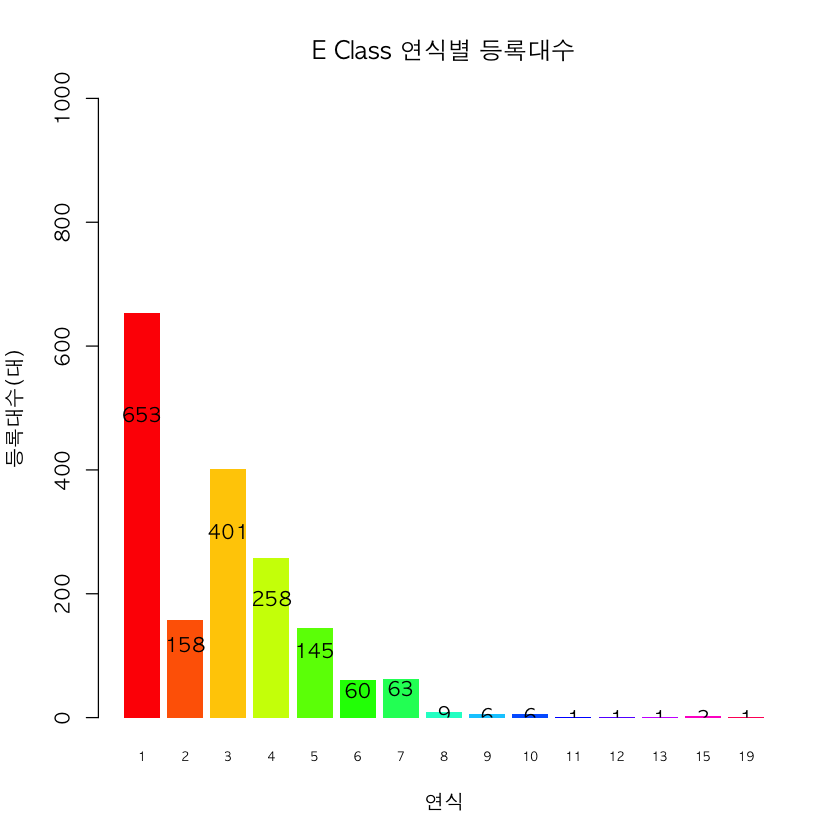

In [201]:
# barplot 
par(family="AppleGothic")
options(warn=-1)

barplot(table(Eclass$age),
        cex.names =0.6,     #x축 글씨 줄이기 
        col = rainbow(length(table(Eclass$age))),
        ylim = c(0,1000),
        xlab = "연식",
        ylab = "등록대수(대)",
        border = F,
        main = "E Class 연식별 등록대수"
       )

for(i in 1:length(table(Eclass$age))) {
    text(0.7+ (i-1)*1.2,table(Eclass$age)[i]/2*1.5,paste(table(Eclass$age)[i]))
}

In [202]:
cor(Eclass$age,Eclass$price)

[1] -0.7535359

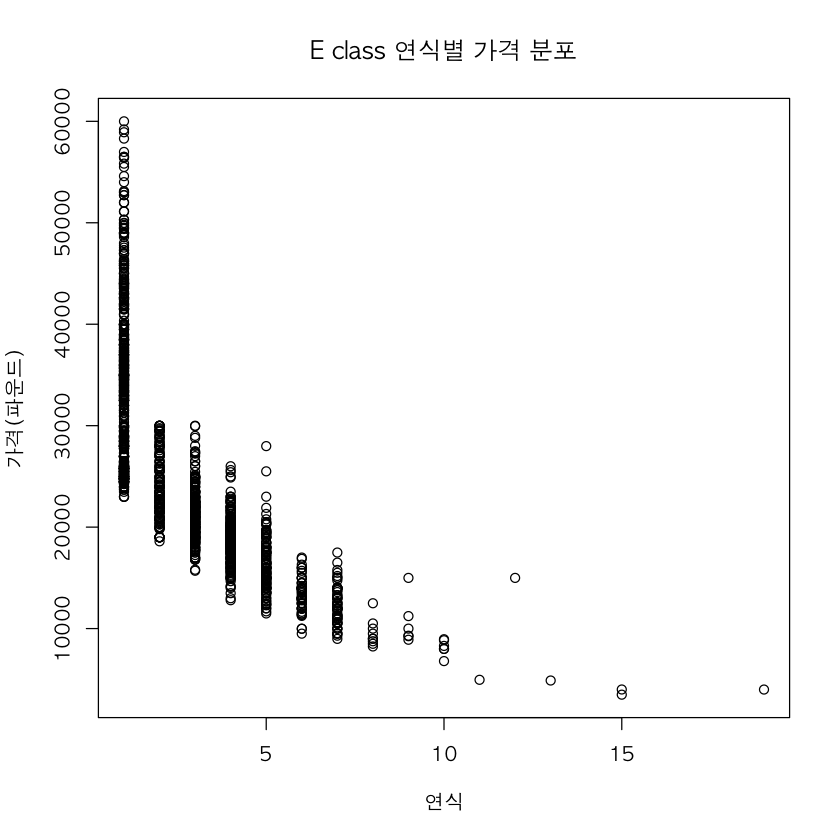

In [203]:
par(family="AppleGothic")
plot(Eclass$age,Eclass$price,
    main="E class 연식별 가격 분포",
     xlab="연식",
     ylab ="가격(파운드)"
    )

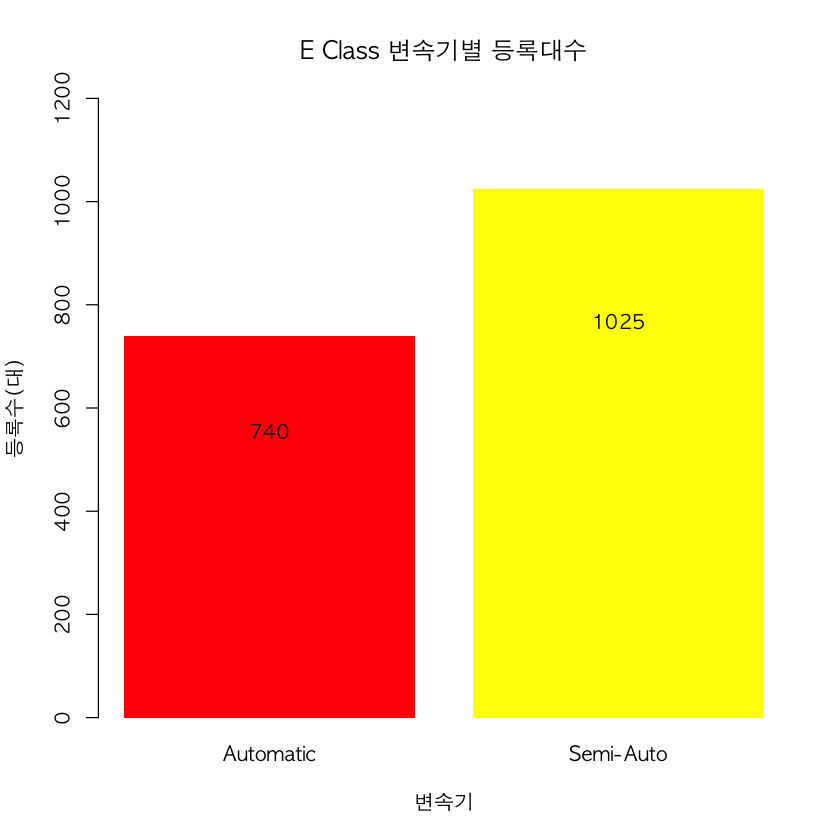

In [204]:
# 변속기별 등록대수 
par(family="AppleGothic")
plot(Eclass$transmission,
     main = "E Class 변속기별 등록대수",
     ylim=c(0,1200),
     xlab="변속기",
     ylab ="등록수(대)",
     col = c("red","yellow","blue"),
     border = F
    )

for(i in 1:length(table(Eclass$transmission))) {
    text(0.7+ (i-1)*1.2,table(Eclass$transmission)[i]/2*1.5,paste(table(Eclass$transmission)[i]))
}

In [205]:
table(Eclass$transmission)


Automatic Semi-Auto 
      740      1025 

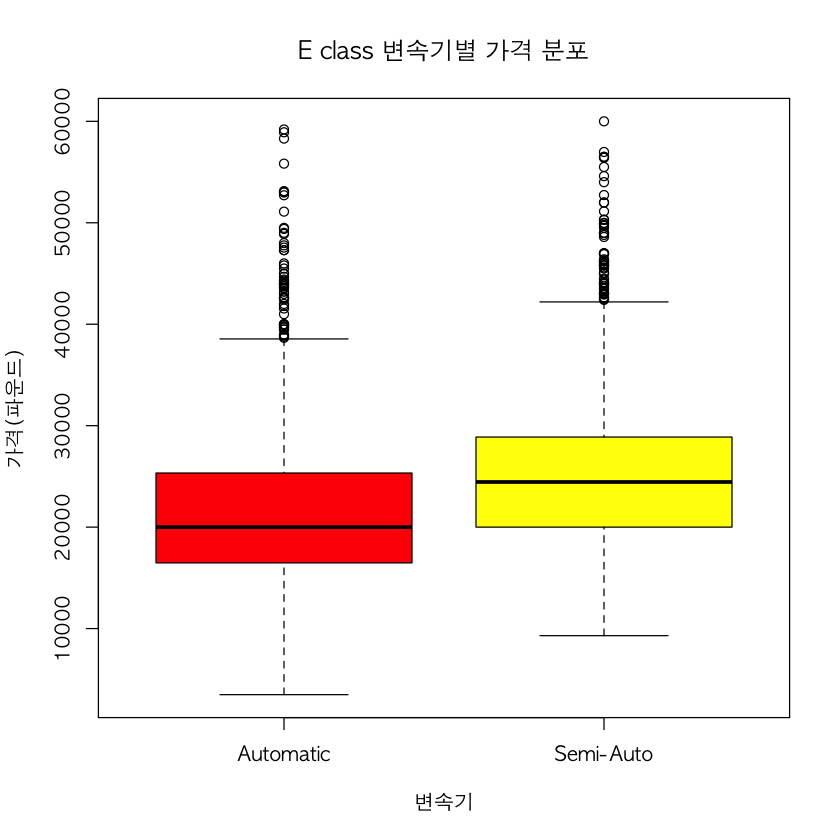

In [206]:
# 변속기 종류별 가격 분포 
par(family="AppleGothic")
plot(Eclass$transmission,Eclass$price,
     col = c("red","yellow","blue"),
     main = "E class 변속기별 가격 분포",
     xlab = "변속기",
     ylab = "가격(파운드)"
    )

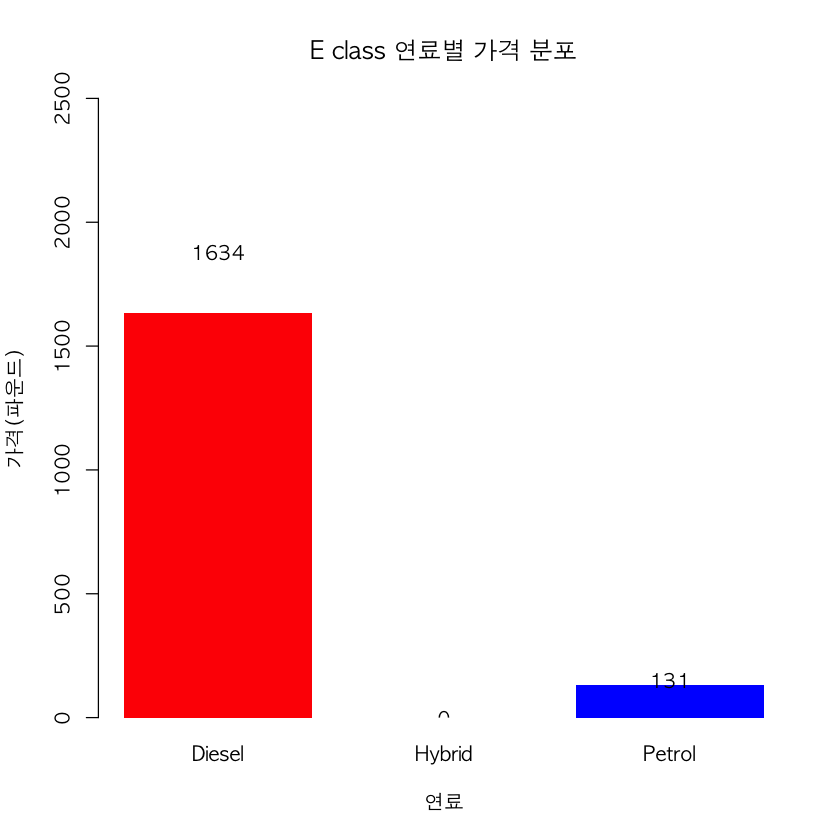

In [207]:
# 연료 종류별 차량수 
par(family="AppleGothic")
barplot(table(Eclass$fuelType),
     col = c("red","yellow","blue"),
     main = "E class 연료별 가격 분포",
     xlab = "연료",
     ylab = "가격(파운드)",
     ylim =c(0,2500),
    border = F
    )
for(i in 1:length(table(Eclass$fuelType))) {
    text(0.7+ (i-1)*1.2,table(Eclass$fuelType)[i]/2*2.3,paste(table(Eclass$fuelType)[i]))
}

In [208]:
table(Eclass$fuelType)


Diesel Hybrid Petrol 
  1634      0    131 

In [209]:
Eclass$fuelType <-factor(Eclass$fuelType)

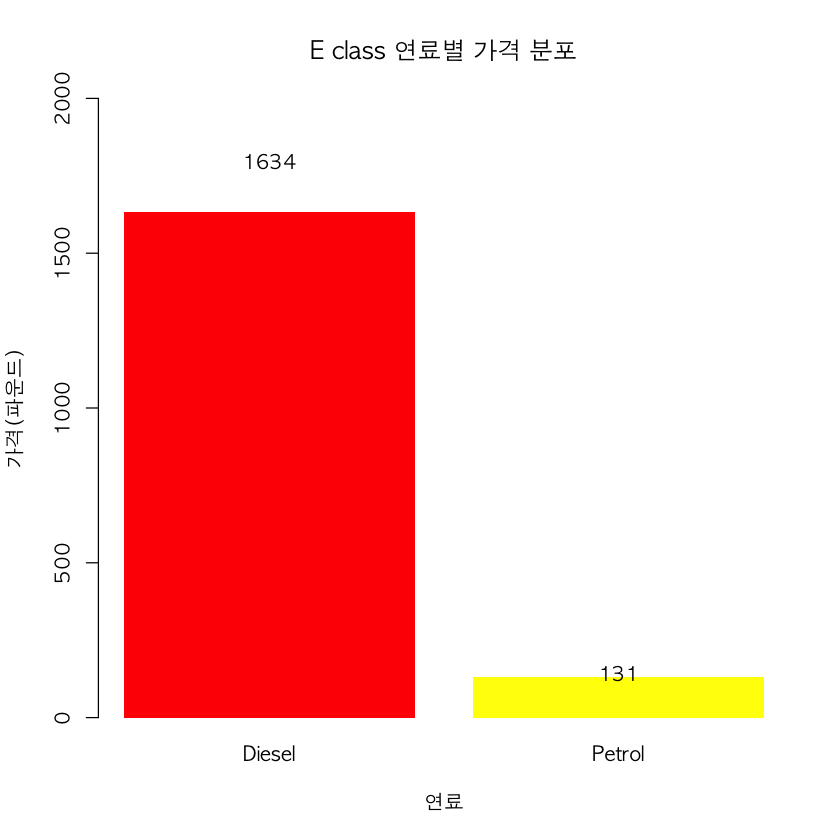

In [210]:
# 연료 종류별 가격분포
par(family="AppleGothic")
barplot(table(Eclass$fuelType),
     col = c("red","yellow","blue"),
     main = "E class 연료별 가격 분포",
     xlab = "연료",
     ylab = "가격(파운드)",
     ylim =c(0,2000),
    border = F
    )
for(i in 1:length(table(Eclass$fuelType))) {
    text(0.7+ (i-1)*1.2,table(Eclass$fuelType)[i]/2*2.2,paste(table(Eclass$fuelType)[i]))
}

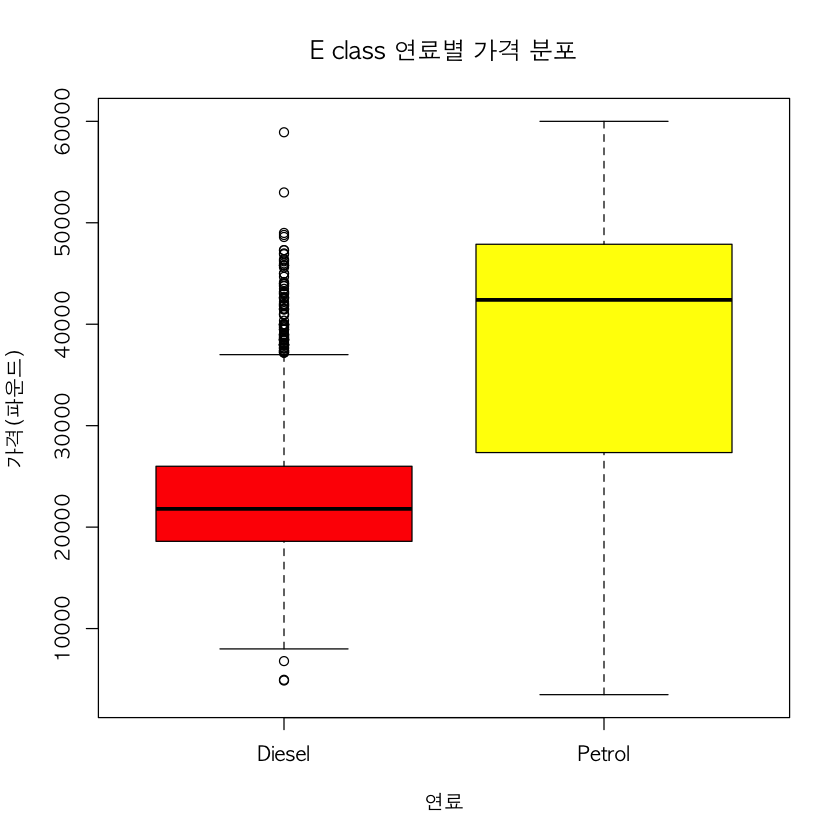

In [211]:
# 연료 종류별 가격 분포  
par(family="AppleGothic")
plot(Eclass$fuelType,Eclass$price,
     col = c("red","yellow","blue"),
     main = "E class 연료별 가격 분포",
     xlab = "연료",
     ylab = "가격(파운드)"
    )

In [212]:
cor(Eclass$mileage,Eclass$price)

[1] -0.7433688

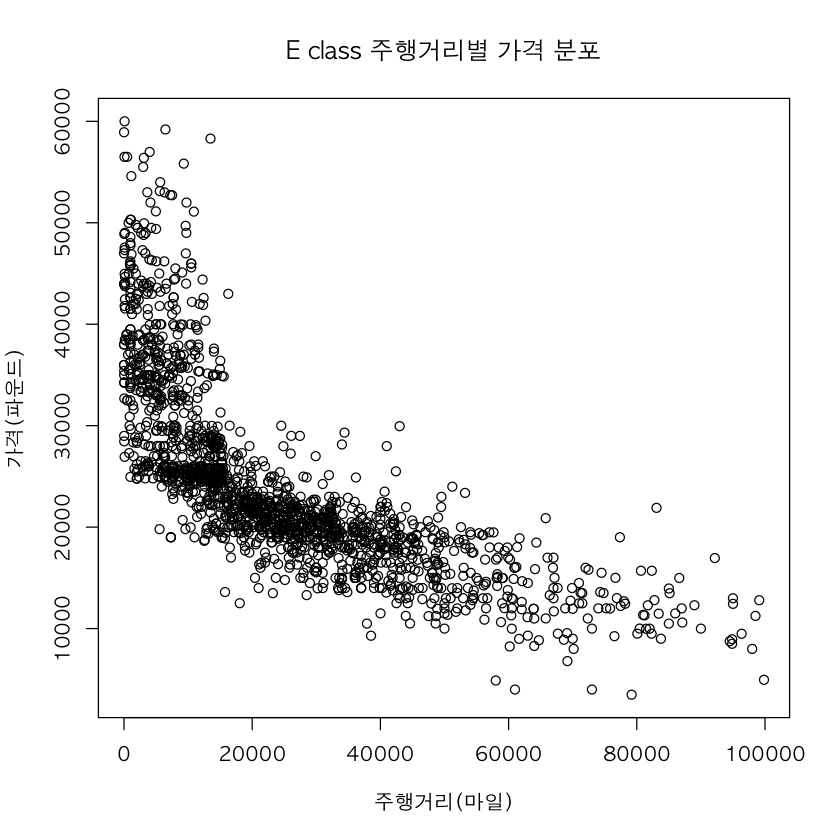

In [213]:
# 주행거리별 가격 분포 
par(family="AppleGothic")
options(scipen=100)
plot(Eclass$mileage,Eclass$price,
    main = "E class 주행거리별 가격 분포",
     xlab = "주행거리(마일)",
     ylab="가격(파운드)"
    )

In [214]:
#테스트용
Eclass_test <-Eclass 

In [215]:
# one-hot encoding
#transimission 
Eclass_test$Automatic = Eclass_test$transmission == "Automatic"
Eclass_test$Manual = Eclass_test$transmission == "Manual"
Eclass_test$Semi_Auto = Eclass_test$transmission == "Semi-Auto"
#fueltype
Eclass_test$Diesel = Eclass_test$fuelType == "Diesel"
Eclass_test$Hybrid = Eclass_test$fuelType == "Hybrid"
Eclass_test$Petrol = Eclass_test$fuelType == "Petrol"

In [216]:
head(Eclass_test)

price,transmission,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
3485,Automatic,79191,Petrol,32.5,1.8,15,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
3990,Automatic,60997,Petrol,29.4,2.0,19,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
3995,Automatic,73000,Petrol,32.5,1.8,15,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
4880,Automatic,58000,Diesel,37.2,3.0,13,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
4950,Automatic,99844,Diesel,27.7,3.0,11,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
6794,Automatic,69173,Diesel,45.6,2.1,10,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE


In [217]:
# fueltype,transmission 삭제
Eclass_test <- Eclass_test[,-c(2,4)]
head(Eclass_test)

price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
3485,79191,32.5,1.8,15,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
3990,60997,29.4,2.0,19,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
3995,73000,32.5,1.8,15,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
4880,58000,37.2,3.0,13,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
4950,99844,27.7,3.0,11,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
6794,69173,45.6,2.1,10,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE


In [218]:
# 0과 1로 바꾸기
Eclass_test$Automatic[Eclass_test$transmission=='Automatic'] <- 1
Eclass_test$Automatic[Eclass_test$transmission !='Automatic'] <- 0

Eclass_test$Manual[Eclass_test$transmission=='Manual'] <- 1
Eclass_test$Manual[Eclass_test$transmission !='Manual'] <- 0

Eclass_test$Semi_Auto[Eclass_test$transmission =='Semi_Auto'] <- 1
Eclass_test$Semi_Auto[Eclass_test$transmission !='Semi_Auto'] <- 0

Eclass_test$Diesel[Eclass_test$fuelType =='Diesel'] <- 1
Eclass_test$Diesel[Eclass_test$fuelType !='Diesel'] <- 0

Eclass_test$Hybrid[Eclass_test$fuelType =='Hybrid'] <- 1
Eclass_test$Hybrid[Eclass_test$fuelType !='Hybrid'] <- 0

Eclass_test$Petrol[Eclass_test$fuelType =='Petrol'] <- 1
Eclass_test$Petrol[Eclass_test$fuelType !='Petrol'] <- 0

In [219]:
head(Eclass_test)

price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
3485,79191,32.5,1.8,15,1,0,0,0,0,1
3990,60997,29.4,2.0,19,1,0,0,0,0,1
3995,73000,32.5,1.8,15,1,0,0,0,0,1
4880,58000,37.2,3.0,13,1,0,0,1,0,0
4950,99844,27.7,3.0,11,1,0,0,1,0,0
6794,69173,45.6,2.1,10,1,0,0,1,0,0


In [220]:
tail(Eclass_test)

,price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
1760,56499,484,31.7,3,1,0,0,1,0,0,1
1761,56980,3999,31.7,3,1,0,0,1,0,0,1
1762,58298,13493,32.1,4,1,1,0,0,0,0,1
1763,58921,12,47.1,3,1,1,0,0,1,0,0
1764,59199,6458,32.1,4,1,1,0,0,0,0,1
1765,59999,90,30.1,4,1,0,0,1,0,0,1


In [221]:
nrow(Eclass_test)

[1] 1765

In [222]:
rownames(Eclass_test) <- c()

## Modelling 

- 우리의 데이터는 regression  
- 우리가 사용할 모델 : 다중선형회귀분석, 인공신경망, 의사결정나무, 랜덤포레스트, SVM   

1. 타겟컬럼과 피처컬럼만 남기고 삭제한 df 새로 만들기 (year, tax, etc.)
2. 데이터 정렬 (price - age - mileage)
3. k-means로 타겟 데이터가 유효한지 확인 : 분류 했을 때 분류 별로 갯수 동일한지로 판단. (6:4 정도로!)
(회귀에서 kmeans의 쓰임은 여기에 있음! 잘 나뉘면 써도 됨!)
4. 데이터를 분류함 (sample함수 써서 할 것, createpartition은 자꾸 바뀌어서..) 
: set.seed() 쓰지 말 것! 
5. 우리가 정한 모델들에 대해서 각각 정확도(결정계수), 평균절대오차 구하기 : 선생님 깃헙 공식 사용 
: Training / Test 각각의 예측력, 오차율 구하기 
: 각각에서 문제, 정답 만들어서 하라고 
: Training / Test의 예측력 비슷해야 함. (트레이닝이 좀 더 높아야함)
6. 모델을 정했으면 전체데이터에 학습시켜서 모델 추출 

In [223]:
# 정렬 
Eclass_test <- arrange(Eclass_test, price,age,mileage)
head(Eclass_test)

price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
3485,79191,32.5,1.8,15,1,0,0,0,0,1
3990,60997,29.4,2.0,19,1,0,0,0,0,1
3995,73000,32.5,1.8,15,1,0,0,0,0,1
4880,58000,37.2,3.0,13,1,0,0,1,0,0
4950,99844,27.7,3.0,11,1,0,0,1,0,0
6794,69173,45.6,2.1,10,1,0,0,1,0,0


In [224]:
#modeling
Eclass_ML <- Eclass_test

In [299]:
# kmeans 이용해서 가격 군집 만들기
Eclass_ML.kmeans <- kmeans(Eclass_ML[1], centers = 5, iter.max = 10000)
Eclass_ML.kmeans$centers

price
15969.65
19243.14
25125.39
28381.08
21913.34


In [300]:
# cluster 군집 번호 컬럼 생성 
Eclass_ML$cluster <- as.factor(Eclass_ML.kmeans$cluster)
head(Eclass_ML)

,price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol,cluster
158,14120,48853,64.2,2.1,4,0,0,1,1,0,0,1
159,14150,44000,57.7,2.1,5,0,0,1,1,0,0,1
160,14199,41560,57.7,2.1,6,0,0,1,1,0,0,1
161,14200,58221,58.9,2.1,4,1,0,0,1,0,0,1
162,14250,56101,58.9,2.1,5,1,0,0,1,0,0,1
163,14290,48285,58.9,2.1,5,1,0,0,1,0,0,1


In [301]:
Eclass_ML<-Eclass_ML[!(Eclass_ML$price <= 14000),]

In [302]:
Eclass_ML<-Eclass_ML[!(Eclass_ML$price >= 30000),]

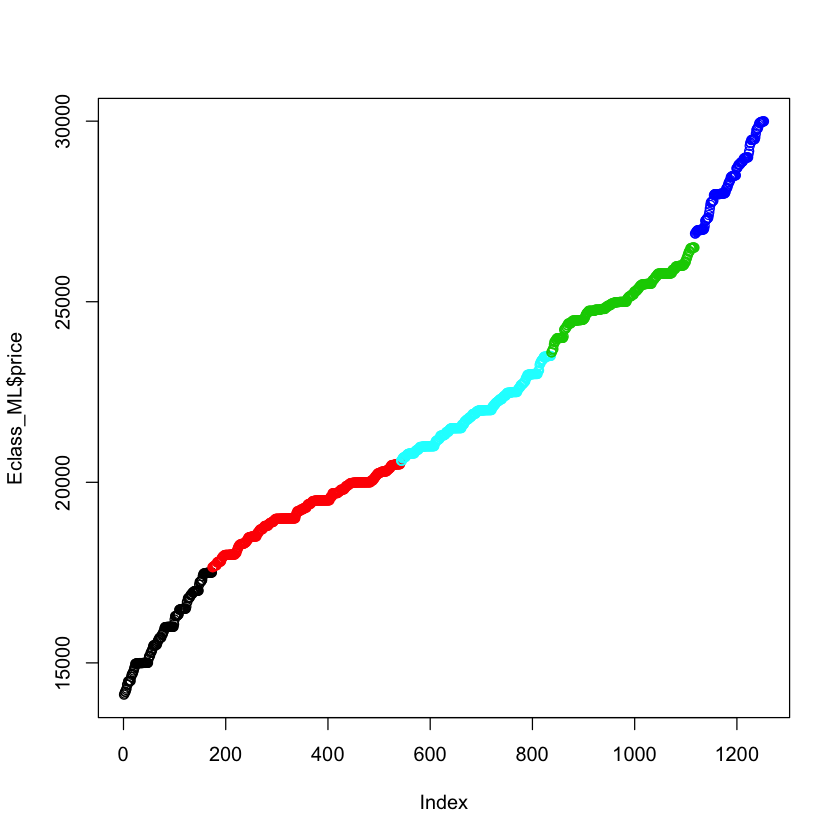

In [303]:
# price 군집결과 plot 그리기 
plot(Eclass_ML$price, col = Eclass_ML$cluster)

In [304]:
# 군집별 개수 확인 
table(Eclass_ML$cluster)


  1   2   3   4   5 
173 369 281 136 294 

 => center : 3
  1   2   3 
744 642 254 
 => center : 4
  1   2   3   4 
250 448 283 659 
 => center : 5
1   2   3   4   5 
637 145 436 278 144 
 => center : 6
  1   2   3   4   5   6 
109 137 580 148 277 389 
 => center : 7
 1   2   3   4   5   6   7 
295 308 207 136 167 369 158 

> center = 7 

In [306]:
# cluster 컬럼 삭제 
Eclass_ML$cluster <- NULL

In [307]:
head(Eclass_ML)

,price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
158,14120,48853,64.2,2.1,4,0,0,1,1,0,0
159,14150,44000,57.7,2.1,5,0,0,1,1,0,0
160,14199,41560,57.7,2.1,6,0,0,1,1,0,0
161,14200,58221,58.9,2.1,4,1,0,0,1,0,0
162,14250,56101,58.9,2.1,5,1,0,0,1,0,0
163,14290,48285,58.9,2.1,5,1,0,0,1,0,0


In [308]:
# 샘플 번호 따오기 
samp <- sample(1:nrow(Eclass_ML), round(nrow(Eclass_ML)*0.7))

In [309]:
samp

[1]  646  232  833  431  678  743  975  489   67  455 1032  576    3  954  859
 [16]  816  429  733  942  879  727 1013  963 1162  223 1042 1044 1238 1048  939
 [31]  130   98  302  766  269  393  853  526 1047  284  736  950  799  427  143
 [46]   53  165  395  682  449  685  385 1059  157   84  332  924  406  410  334
 [61]  662  695  350 1145  205   58 1232  505  134 1022  371  820  296   86  503
 [76]  869  275  935  391  292  488  127  113  708  632 1080  558  931   47  797
 [91]  268  444  108  446  103  517  479 1123  438  460   29  569 1150  258  389
[106]  819  777   74  619   69 1202  173   38  195   13  144  984 1023  254  330
[121]  464  313  775  358   12   14  257  207  703  318  838  608 1005 1176  626
[136] 1171  222 1146  657 1136  137  829  629  267  739  947 1148 1208  886  261
[151]  290  174  666  262  982  992  929  300  606  234  940  364  778  627 1058
[166]  676  411 1074  322 1228  920 1242 1062  664  754  136 1043    4 1009 1029
[181]  771  997  985  236  413  507 1143  338  380  635  567 1116  697  386  191
[196]  565  680  114 1166  403  384   51  245  337  656   41  281  307  671  107
[211]  648  468  231  974  135   20  806  312  918 1184 1111 1239  748  352  905
[226]  436  347  762  638  878    1  871  885  889  802  447  353  482  757  153
[241]  512   37  854  376  988  409  213   43  747 1041  309 1124  291  161  958
[256]   96  375  388  528  189  776  434 1057 1247  320  175  437  677  253 1157
[271]  943  218  789  787   26  425  147 1096  724  686 1122  428  534  288  289
[286]  118 1188  317 1038  906   57 1107  713 1127  670  615  487  861 1244  772
[301]   54 1137  491  808  901  369 1113   88  603  458  718  962 1056  621  139
[316]  814  170  101  817   46  359  390  564  183 1185  379  196  855  563  394
[331] 1167  595 1227  451  836 1070 1109  788  160 1212 1045 1131  374  529  907
[346]  572  674  131  996  351 1248 1090  807  585  903  264  308   25   63  737
[361] 1061  598  155  900 1071  430  299  921  527  980  976  248  553  129  683
[376]  219  373   65  781  100  229  180  734 1097  989  710   80  717 1186  756
[391] 1017  566  584 1012   70 1081   22   18  502 1138  483   39  401 1210  611
[406] 1179  702  933  740  631 1083  957  185  166  270  241  492 1156  412  774
[421] 1002 1187  265  246 1126 1115  271  823  340  531  525   16  893 1173   89
[436]  323  110  916  706  675  969  518  514 1165 1213  383  362  599  876  182
[451] 1182  860    2  849 1046  154  696  796  392  639  473 1008  596  688   94
[466]  684 1140  758  423  801 1223   49  653   64 1031  856  523  602  346  883
[481]  221 1034 1142  456  792  832 1011  588  594  305    7  493  485  570  711
[496]  818  511  356 1040  164  345 1215  524  321  850  761 1026 1203 1076  742
[511]  348 1099  986  821  667  120  794 1198  363   48  494  508 1217  941  655
[526]  691 1001  274  111  341  583  892  520  416  432  605  372  344 1036   34
[541] 1068   81  480 1069 1177  472 1192  944  868  117  294  199  215 1112  405
[556]  846 1093  759  329  650 1094 1195  206  867   71  336  577 1025  280  237
[571]  243  433 1102  550  786  327  851  825  152 1027 1095  146  177  590  214
[586]  459  959  628 1006  624 1240  964  133 1060  979  704    6  782  151  658
[601]  981  630  909  858  441  694   77  349  923  881  592   42  325  368 1018
[616] 1133  420  793   27 1067  633 1078  752   62  623  498  870  609 1091 1141
[631] 1168  304  557  522  240  467  244  453 1237  470  282   66 1220   28   35
[646]  121   56 1170  568  904  172  462  138   92  510 1149  798 1200 1235  973
[661]  968 1118  580  874  484 1063  911  927   19  421 1104  540  824   76  145
[676]  496  316  835  561  115 1241  319 1024 1014   15  613 1199  966  233  119
[691]  937  422  765   32  763 1151 1163   79  701  535  242  845   91   75  956
[706]  542  343  610  873  192 1087  370  571   36  679  461  785  620   72   60
[721]  331  543  536 1153  149   95 1050  622  926  178  220  930  471  994  978
[736] 1190 1209 1010 1250  810 10

In [310]:
data.tr <- Eclass_ML[samp,]
data.test <- Eclass_ML[-samp,]

In [354]:
# 표준화 하기 (인공신경망, svm)
Eclass_ML_scale <- as.data.frame(scale(Eclass_ML))

In [355]:
# 가격만 표준화 안 하고 원래 가격 넣기 
Eclass_ML_scale$price <- Eclass_ML$price

In [356]:
# 표준화 샘플 번호 따오기 
samp2 <- sample(1:nrow(Eclass_ML_scale), round(nrow(Eclass_ML_scale)*0.7))

In [357]:
data.tr2 <- Eclass_ML_scale[samp2,]
data.test2 <- Eclass_ML_scale[-samp2,]

In [315]:
# 모델학습 
# 라이브러리 import 
library(caret) 
library(e1071) 
library(party) 
library(nnet) 
library(randomForest) 
library(Metrics)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall



In [358]:
# data.tr의 문제, 정답 만들기 
data.tr.x <- data.tr[,-1]
data.tr.y <- data.tr[,1]

In [359]:
# data.test의 문제, 정답 만들기 
data.test.x <- data.test[,-1]
data.test.y <- data.test[,1]

In [360]:
# data.tr2의 문제, 정답 만들기 
data.tr2.x <- data.tr2[,-1]
data.tr2.y <- data.tr2[,1]

In [361]:
# data.test2의 문제, 정답 만들기 
data.test2.x <- data.test2[,-1]
data.test2.y <- data.test2[,1]

In [362]:
# 모델 만들기 
# 인공신경망 
model.nnet <- nnet(price ~.,data = data.tr2, size = 22, linout =T)

# weights:  265
initial  value 0.000000 
final  value 0.000000 
converged


In [363]:
# 트레이닝 2 데이터 성능 
pred_tr <- predict(model.nnet,newdata = data.tr2.x, type = "raw")

In [364]:
# correct = 정답 / predicted = 예측 
correct <- data.tr2.y
predicted <- pred_tr
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] NA

[1] NA

In [365]:
# 테스트 데이터 성능 
pred_test <- predict(model.nnet, newdata = data.test.x)
# correct = 정답 / predicted = 예측 
correct <- data.test.y
predicted <- pred_test
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] -34.47391

[1] 21829

#### 다중선형회귀분석

- 선형회귀분석의 가정 검토    
    1) 선형성    
    2) 등분산성(x에 대한 잔차의 산점도를 그릴 때, x값에 관계 없이 잔차들의 분산이 일정)    
    3) 정규성 (Q-Qplot이 대각방향 형태)       
- 회귀분석의 검토   
    1) 회귀계수들이 유의미한가? (해당 계수의 t통계량의 p-value가 0.05 보다 작아야 한다)     
    2) 결정계수 확인 (multiple r squared)    
    3) 잔차를 그래프로 그리고 회귀진단 

In [366]:
# 모델 만들기 
# 다중선형회귀분석 
model_lm <- lm(price ~ ., data = data.tr)
model_lm


Call:
lm(formula = price ~ ., data = data.tr)

Coefficients:
(Intercept)      mileage          mpg   engineSize          age    Automatic  
35808.73350     -0.08174   -119.01369    900.53714  -2086.12769   -585.79642  
     Manual    Semi_Auto       Diesel       Hybrid       Petrol  
         NA           NA   -219.78868           NA           NA  


In [367]:
summary(model_lm)


Call:
lm(formula = price ~ ., data = data.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-4898.0 -1052.7  -157.0   899.2  6192.5 

Coefficients: (4 not defined because of singularities)
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) 35808.73350   850.93348  42.082 < 0.0000000000000002 ***
mileage        -0.08174     0.00467 -17.503 < 0.0000000000000002 ***
mpg          -119.01369    10.74593 -11.075 < 0.0000000000000002 ***
engineSize    900.53714   171.89746   5.239          0.000000203 ***
age         -2086.12769    57.26991 -36.426 < 0.0000000000000002 ***
Automatic    -585.79642   112.08330  -5.226          0.000000216 ***
Manual               NA          NA      NA                   NA    
Semi_Auto            NA          NA      NA                   NA    
Diesel       -219.78868   361.46140  -0.608                0.543    
Hybrid               NA          NA      NA                   NA    
Petrol               NA          NA      NA 

In [368]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model_lm, newdata = data.tr.x)

In [369]:
# correct = 정답 / predicted = 예측 
correct <- data.tr.y
predicted <- pred_tr
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] 0.830601

[1] 1221.25

In [370]:
# 테스트 데이터 성능 
pred_test <- predict(model_lm, newdata = data.test.x)
# correct = 정답 / predicted = 예측 
correct <- data.test.y
predicted <- pred_test
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] 0.7777935

[1] 1289.84

> 0.002 차이 

#### 의사결정나무 

In [371]:
# Model 만들기
model.ctree <- ctree(price ~., data=data.tr)

In [372]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model.ctree, newdata = data.tr.x)

In [373]:
# correct = 정답 / predicted = 예측 
correct <- data.tr.y
predicted <- pred_tr
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] 0.8784849

[1] 991.2044

In [374]:
# 테스트 데이터 성능 
pred_test <- predict(model.ctree, newdata = data.test.x)

In [375]:
# correct = 정답 / predicted = 예측 
correct <- data.test.y
predicted <- pred_test
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] 0.7605834

[1] 1245.209

> 0.03 차이 

#### randomforest

In [376]:
# Model 만들기 
model.rf <- randomForest(price ~ ., data = data.tr, ntree=100)

In [377]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model.rf, newdata = data.tr.x)

In [378]:
# correct = 정답 / predicted = 예측 
correct <- data.tr.y
predicted <- pred_tr
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] 0.909677

[1] 885.7347

In [379]:
# 테스트 데이터 성능 
pred_test <- predict(model.rf,newdata = data.test.x)

In [380]:
# correct = 정답 / predicted = 예측 
correct <- data.test.y
predicted <- pred_test
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] 0.8194163

[1] 1108.352

> 0.03 

#### SVM

In [381]:
# Model 만들기 
model.svm = svm(price ~., data=data.tr)

In [382]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model.svm, newdata = data.tr.x)

In [383]:
# correct = 정답 / predicted = 예측 
correct <- data.tr.y
predicted <- pred_tr
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] -0.01016906

[1] 3199.851

In [384]:
# 테스트 데이터 성능 
pred_test <- predict(model.svm, newdata = data.test.x)

In [385]:
# correct = 정답 / predicted = 예측 
correct <- data.test.y
predicted <- pred_test
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
mae(correct, predicted)

[1] -0.02103972

[1] 3062.244

# svm결정

In [386]:
# 의사결정나무  기반으로 최적의 군집 개수 정하기 
# Model 만들기 
model.svm = svm(price ~., data=Eclass_ML)

In [387]:
# 모델 저장 
saveRDS(model.svm , "../Data/Benz_Eclass_svm.rds")

In [388]:
# 모델 불러와서 예측 테스트 해보기 
svm <- readRDS("../Data/Benz_Eclass_svm.rds")

In [389]:
head(Eclass_ML)

,price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
158,14120,48853,64.2,2.1,4,0,0,1,1,0,0
159,14150,44000,57.7,2.1,5,0,0,1,1,0,0
160,14199,41560,57.7,2.1,6,0,0,1,1,0,0
161,14200,58221,58.9,2.1,4,1,0,0,1,0,0
162,14250,56101,58.9,2.1,5,1,0,0,1,0,0
163,14290,48285,58.9,2.1,5,1,0,0,1,0,0


In [390]:
nrow(Eclass_ML)

[1] 1253

In [391]:
tail(Eclass_ML)

,price,mileage,mpg,engineSize,age,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
1405,29980,3421,57.7,2,2,0,0,1,1,0,0
1406,29980,7806,51.4,3,2,0,0,1,1,0,0
1407,29981,870,57.7,2,2,1,0,0,1,0,0
1408,29991,10356,70.6,2,1,1,0,0,1,0,0
1409,29992,5310,51.4,3,2,1,0,0,1,0,0
1410,29995,24531,40.4,2,3,0,0,1,0,0,1


In [392]:
# 저장 
write.csv(Eclass_ML,"../Data/benz_Eclass_final.csv",row.names =F)

In [393]:
predict(svm,(data.frame(mileage = 85000, mpg = 52.3, 
                  engineSize = 2.1, age = 7,
                  Automatic = 1, Manual = 0, Semi_Auto = 0 , 
                  Diesel = 1, Hybrid=0, Petrol = 0
                  )))

1 
21299.9

In [394]:
# db 확인
max(Eclass_ML$mileage)
min(Eclass_ML$mileage)

max(Eclass_ML$mpg)
min(Eclass_ML$mpg)

max(Eclass_ML$engineSize)
min(Eclass_ML$engineSize)

max(Eclass_ML$age)
min(Eclass_ML$age)


[1] 92173

[1] 20

[1] 72.4

[1] 19.8

[1] 6.2

[1] 0

[1] 12

[1] 1